# Importing Line

In [2]:

import numpy as np
import pandas as pd
from pathlib import Path
import gc


# xsuite
import xtrack as xt
import xmask as xm
import xfields as xf
import xpart as xp


# BBStudies
import sys
sys.path.append('/Users/pbelanger/ABPLocal/BBStudies')
import BBStudies.Tracking.XsuitePlus as xPlus
import BBStudies.Tracking.InteractionPoint as inp
import BBStudies.Physics.Detuning as tune
import BBStudies.Plotting.BBPlots as bbplt
import BBStudies.Physics.Base as phys
import BBStudies.Physics.Constants as cst

# JOB imports
import importlib
sys.path.append('../../')
main_002 = importlib.import_module('Jobs.002_user_specific_tasks.main')
user_specific_tasks = main_002.user_specific_tasks



# Load collider and install collimators
collider = user_specific_tasks( config_path       = "../002_user_specific_tasks/config.yaml",
                                collider_path     = "../001_configure_collider/zfruits/collider_001.json",
                                collider_out_path = None,
                                collider          = None)

# collider = xt.Multiline.from_json('../000_build_collider_from_mad/zfruits/collider_000.json')

# Choosing context for multithreading
#--------------------------------------
import xobjects as xo
context = xo.ContextCpu(omp_num_threads='auto')
collider.build_trackers(_context=context)
#--------------------------------------

twiss_full = {}
twiss_full['lhcb1'] = collider['lhcb1'].twiss().to_pandas()
twiss_full['lhcb2'] = collider['lhcb2'].twiss().reverse().to_pandas()

# Filtering twiss to get rid of slices
twiss = {}
for sequence in ['lhcb1','lhcb2']:
    twiss[sequence] = xPlus.filter_twiss(twiss_full[sequence].set_index('name'),entries=['drift','..','_entry','_exit']).reset_index()




Loading collider...
Done loading line from dict.           
Done loading line from dict.           
Done loading line from dict.           
Done loading line from dict.           
Installing collimators...
Installing tcp.d6l7.b1 in lhcb1...
Installing tcp.c6l7.b1 in lhcb1...
Installing tcp.b6l7.b1 in lhcb1...
Installing tcp.d6r7.b2 in lhcb2...
Installing tcp.c6r7.b2 in lhcb2...
Installing tcp.b6r7.b2 in lhcb2...
Compiling ContextCpu kernels...


97f287f4b9064a3784ea6d82177d5a00.c:2930:17: warning: variable 'num_lost' set but not used [-Wunused-but-set-variable]
        int64_t num_lost = 0;
                ^
97f287f4b9064a3784ea6d82177d5a00.c:2929:17: warning: variable 'num_active' set but not used [-Wunused-but-set-variable]
        int64_t num_active = 0;
                ^
97f287f4b9064a3784ea6d82177d5a00.c:13681:12: warning: variable 'gamma' set but not used [-Wunused-but-set-variable]
    double gamma          = energy / m0;     // [1]
           ^
97f287f4b9064a3784ea6d82177d5a00.c:13947:9: warning: variable 'i' set but not used [-Wunused-but-set-variable]
    int i=0;
        ^
97f287f4b9064a3784ea6d82177d5a00.c:14035:62: warning: variable 'ps_e_prime' set but not used [-Wunused-but-set-variable]
    double e_e_prime, px_e_prime, py_e_prime, pzeta_e_prime, ps_e_prime, pt_e_prime;  // [GeV, 1, 1, 1, 1, 1] scattered primary
                                                             ^
97f287f4b9064a3784ea6d82177d5a00.c:14

Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...


2835a0e41f384f70925a4348b164f4bc.c:2930:17: warning: variable 'num_lost' set but not used [-Wunused-but-set-variable]
        int64_t num_lost = 0;
                ^
2835a0e41f384f70925a4348b164f4bc.c:2929:17: warning: variable 'num_active' set but not used [-Wunused-but-set-variable]
        int64_t num_active = 0;
                ^
2835a0e41f384f70925a4348b164f4bc.c:13681:12: warning: variable 'gamma' set but not used [-Wunused-but-set-variable]
    double gamma          = energy / m0;     // [1]
           ^
2835a0e41f384f70925a4348b164f4bc.c:13947:9: warning: variable 'i' set but not used [-Wunused-but-set-variable]
    int i=0;
        ^
2835a0e41f384f70925a4348b164f4bc.c:14035:62: warning: variable 'ps_e_prime' set but not used [-Wunused-but-set-variable]
    double e_e_prime, px_e_prime, py_e_prime, pzeta_e_prime, ps_e_prime, pt_e_prime;  // [GeV, 1, 1, 1, 1, 1] scattered primary
                                                             ^
2835a0e41f384f70925a4348b164f4bc.c:14

Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...


2da76771576d444ea01e8de1efe494ad.c:2929:17: warning: variable 'num_active' set but not used [-Wunused-but-set-variable]
        int64_t num_active = 0;
                ^
2da76771576d444ea01e8de1efe494ad.c:2930:17: warning: variable 'num_lost' set but not used [-Wunused-but-set-variable]
        int64_t num_lost = 0;
                ^
2 warnings generated.
ld: warning: -pie being ignored. It is only used when linking a main executable


Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...


c0b9cea2652b40dd8613efa35e5471af.c:2930:17: warning: variable 'num_lost' set but not used [-Wunused-but-set-variable]
        int64_t num_lost = 0;
                ^
c0b9cea2652b40dd8613efa35e5471af.c:2929:17: warning: variable 'num_active' set but not used [-Wunused-but-set-variable]
        int64_t num_active = 0;
                ^
2 warnings generated.
ld: warning: -pie being ignored. It is only used when linking a main executable


Done compiling ContextCpu kernels.


In [2]:
len(collider['lhcb1'].elements)

118611

# Tracking test

In [3]:
n_sigmas = 10
n_part   = int(5e3)
x_norm  = np.random.uniform(-n_sigmas, n_sigmas, n_part) 
px_norm = np.random.uniform(-n_sigmas/10, n_sigmas/10, n_part)
y_norm  = np.random.uniform(-n_sigmas, n_sigmas, n_part) 
py_norm = np.random.uniform(-n_sigmas/10, n_sigmas/10, n_part)

In [4]:
# Reloading xPlus
xPlus = importlib.reload(xPlus)
seq = 'lhcb1'

# Create initial particles


part = xp.build_particles( line = collider[seq],
                            x_norm=x_norm,
                            px_norm=px_norm,
                            y_norm=y_norm,
                            py_norm=py_norm,
                            nemitt_x=2.5e-6, nemitt_y=2.5e-6,
                            _context=context)



num_turns = 100
# collider[seq].track(part, num_turns=num_turns,turn_by_turn_monitor=True)
# df = pd.DataFrame(collider[seq].record_last_track.to_dict()['data'])
# df.groupby('at_turn').count()

monitor_TCP = {'tcp.d6l7.b1':xt.ParticlesMonitor(start_at_turn=0, stop_at_turn=num_turns,num_particles=n_part)}
collider[seq].discard_tracker()
for ee_name,monitor in monitor_TCP.items():
    monitor.allow_backtrack=False
    collider[seq].insert_element(index=ee_name, element=monitor, name=ee_name+'_monitor')
collider[seq].build_tracker(_context=context)





# # Tracking
tracked = xPlus.Tracking_Interface(collider[seq],particles=part,n_turns = 100,method='6D',progress=True,saveVars = False,monitor = monitor_TCP['tcp.d6l7.b1'])
# tracked = xPlus.Tracking_Interface(collider[seq],particles=part,n_turns = 100,method='4d',progress=True,saveVars = False)

# _tracked = xPlus.Tracking_Interface(collider[seq],particles=part,n_turns = 100,method='6D',progress=False,saveVars = False)
# _tracked.df.groupby('at_turn').count()
# tracked.df.groupby('turn').count()
tracked.df.groupby('at_element').count()


NameError: name 'monitor_TCP' is not defined

In [7]:
tracked.df.groupby('at_element').get_group(52215).mean()

start_tracking_at_element    0.000000e+00
q0                           0.000000e+00
mass0                        0.000000e+00
s                            1.312446e+04
zeta                         1.763349e-05
chi                          1.000000e+00
charge_ratio                 1.000000e+00
weight                       0.000000e+00
particle_id                  2.417707e+02
at_element                   5.221500e+04
at_turn                      4.574626e+01
state                        1.000000e+00
parent_particle_id           2.417707e+02
_rng_s1                      0.000000e+00
_rng_s2                      0.000000e+00
_rng_s3                      0.000000e+00
_rng_s4                      0.000000e+00
x                           -5.349802e-06
y                           -2.536602e-07
px                           1.126839e-07
py                           3.784562e-08
delta                        1.034633e-06
ptau                         1.034633e-06
rvv                          1.000

In [15]:
tracked.df[tracked.df['beta0']>0.999].groupby('at_element').count()

,start_tracking_at_element,q0,mass0,s,zeta,chi,charge_ratio,weight,particle_id,at_turn,...,y,px,py,delta,ptau,rvv,rpp,p0c,beta0,gamma0
at_element,,,,,,,,,,,,,,,,,,,,,
0,60,60,60,60,60,60,60,60,60,60,...,60,60,60,60,60,60,60,60,60,60
52215,13021,13021,13021,13021,13021,13021,13021,13021,13021,13021,...,13021,13021,13021,13021,13021,13021,13021,13021,13021,13021


In [13]:
tracked.df[tracked.df['beta0']>0.999].groupby('at_element').get_group(0).mean()

start_tracking_at_element    0.000000e+00
q0                           0.000000e+00
mass0                        0.000000e+00
s                            0.000000e+00
zeta                         6.266877e-06
chi                          1.000000e+00
charge_ratio                 1.000000e+00
weight                       0.000000e+00
particle_id                  2.247000e+02
at_element                   0.000000e+00
at_turn                      5.100000e+00
state                        1.000000e+00
parent_particle_id           2.247000e+02
_rng_s1                      0.000000e+00
_rng_s2                      0.000000e+00
_rng_s3                      0.000000e+00
_rng_s4                      0.000000e+00
x                            9.871919e-05
y                            2.475171e-04
px                          -1.699404e-06
py                          -8.765246e-07
delta                        1.029203e-06
ptau                         1.029203e-06
rvv                          1.000

In [6]:
tracked.df.groupby('at_element').get_group(0).mean()

start_tracking_at_element    0.000000e+00
q0                           0.000000e+00
mass0                        0.000000e+00
s                            0.000000e+00
zeta                         1.016828e-08
chi                          1.622543e-03
charge_ratio                 1.622543e-03
weight                       0.000000e+00
particle_id                  3.645853e-01
at_element                   0.000000e+00
at_turn                      8.274967e-03
state                        1.622543e-03
parent_particle_id           3.645853e-01
_rng_s1                      0.000000e+00
_rng_s2                      0.000000e+00
_rng_s3                      0.000000e+00
_rng_s4                      0.000000e+00
x                            1.601761e-07
y                            4.016071e-07
px                          -2.757356e-09
py                          -1.422198e-09
delta                        1.669926e-09
ptau                         1.669926e-09
rvv                          1.622

In [8]:
monitor_TCP = {'tcp.d6l7.b1':xt.ParticlesMonitor(start_at_turn=0, stop_at_turn=num_turns,num_particles=n_part)}

In [11]:
test = xt.ParticlesMonitor(start_at_turn=0, stop_at_turn=num_turns,num_particles=n_part)
test.allow_backtrack=False

In [12]:
import rich
rich.inspect(test)

/Users/pbelanger/ABPLocal/BBStudies/Executables/py-BB/xpart/xpart/particles/particles_base.py:1185: RuntimeWarning: invalid value encountered in divide
  pzeta = self.ptau / self.beta0


╭───────────────────────── <class 'xtrack.monitors.particles_monitor.ParticlesMonitor'> ──────────────────────────╮
│ ╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────╮ │
│ │ ParticlesMonitor(start_at_turn=0, stop_at_turn=100, part_id_start=0, part_id_end=500, ebe_mode=0,           │ │
│ │ n_records=50000, n_repetitions=1, repetition_period=-1, flag_auto_to_numpy=1, data=Particles(_capacity=0,   │ │
│ │ _num_active_particles=0, _num_lost_particles=0, start_tracking_at_element=0, q0=0.0, mass0=0.0, _p0c=[0. 0. │ │
│ │ 0. ... 0. 0. 0.], _gamma0=[0. 0. 0. ... 0. 0. 0.], _beta0=[0. 0. 0. ... 0. 0. 0.], s=[0. 0. 0. ... 0. 0.    │ │
│ │ 0.], zeta=[0. 0. 0. ... 0. 0. 0.], _ptau=[0. 0. 0. ... 0. 0. 0.], _delta=[0. 0. 0. ... 0. 0. 0.], _rpp=[0.  │ │
│ │ 0. 0. ... 0. 0. 0.], _rvv=[0. 0. 0. ... 0. 0. 0.], chi=[0. 0. 0. ... 0. 0. 0.], charge_ratio=[0. 0. 0. ...  │ │
│ │ 0. 0. 0.], weight=[0. 0. 0. ... 0. 0. 0.], particle_id=[0 0 0 ... 0 0 0], at_element=[0 0 0 ... 0 0 0],     │ │
│ │ at_turn=[0 0 0 ... 0 0 0], state=[0 0 0 ... 0 0 0], parent_particle_id=[0 0 0 ... 0 0 0], _rng_s1=[0 0 0    │ │
│ │ ... 0 0 0], _rng_s2=[0 0 0 ... 0 0 0], _rng_s3=[0 0 0 ... 0 0 0], _rng_s4=[0 0 0 ... 0 0 0], x=[0. 0. 0.    │ │
│ │ ... 0. 0. 0.], y=[0. 0. 0. ... 0. 0. 0.], px=[0. 0. 0. ... 0. 0. 0.], py=[0. 0. 0. ... 0. 0. 0.]))          │ │
│ ╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────╯ │
│                                                                                                                 │
│                  allow_backtrack = False                                                                        │
│                       at_element = array([[0, 0, 0, ..., 0, 0, 0],                                              │
│                                           [0, 0, 0, ..., 0, 0, 0],                                              │
│                                           [0, 0, 0, ..., 0, 0, 0],                                              │
│                                           ...,                                                                  │
│                                           [0, 0, 0, ..., 0, 0, 0],                                              │
│                                           [0, 0, 0, ..., 0, 0, 0],                                              │
│                                           [0, 0, 0, ..., 0, 0, 0]])                                             │
│                          at_turn = array([[0, 0, 0, ..., 0, 0, 0],                                              │
│                                           [0, 0, 0, ..., 0, 0, 0],                                              │
│                                           [0, 0, 0, ..., 0, 0, 0],                                              │
│                                           ...,                                                                  │
│                                           [0, 0, 0, ..., 0, 0, 0],                                              │
│                                           [0, 0, 0, ..., 0, 0, 0],                                              │
│                                           [0, 0, 0, ..., 0, 0, 0]])                                             │
│                    auto_to_numpy = True                                                                         │
│               behaves_like_drift = True                                                                         │
│                            beta0 = LinkedArrayCpu([[0., 0., 0., ..., 0., 0., 0.],                               │
│                                                    [0., 0., 0., ..., 0., 0., 0.],                               │
│                                                    [0., 0., 0., ..., 0., 0., 0.],                               │
│                                                    ...

In [7]:
tracked.monitor.to_dict()['data']['at_element']

array([52215,     0,     0, ...,     0,     0,     0])

In [6]:
pd.DataFrame(collider[seq].element_dict['tcp.d6l7.b1_monitor'].to_dict()['data'])

KeyError: 'tcp.d6l7.b1_monitor'

In [5]:
collider[seq].element_dict['tcp.d6l7.b1_monitor']

ParticlesMonitor(start_at_turn=0, stop_at_turn=100, part_id_start=0, part_id_end=500, ebe_mode=0, n_records=50000, n_repetitions=1, repetition_period=-1, flag_auto_to_numpy=1, data=Particles(_capacity=0, _num_active_particles=0, _num_lost_particles=0, start_tracking_at_element=0, q0=0.0, mass0=0.0, _p0c=[6.79999994e+12 6.79999994e+12 0.00000000e+00 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00], _gamma0=[7247.36468857 7247.36468857    0.         ...    0.            0.
    0.        ], _beta0=[0.99999999 0.99999999 0.         ... 0.         0.         0.        ], s=[13124.4636 13124.4636     0.     ...     0.         0.         0.    ], zeta=[4.53544635e-06 5.11066686e-06 0.00000000e+00 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00], _ptau=[1.02813523e-06 1.02812523e-06 0.00000000e+00 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00], _delta=[1.02813524e-06 1.02812524e-06 0.00000000e+00 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00], _rpp=[0.99999897 0.99999897 0.        

In [18]:
monitor_TCP['tcp.d6l7.b1']

ParticlesMonitor(start_at_turn=0, stop_at_turn=100, part_id_start=0, part_id_end=500, ebe_mode=0, n_records=50000, n_repetitions=1, repetition_period=-1, flag_auto_to_numpy=1, data=Particles(_capacity=0, _num_active_particles=0, _num_lost_particles=0, start_tracking_at_element=0, q0=0.0, mass0=0.0, _p0c=[0. 0. 0. ... 0. 0. 0.], _gamma0=[0. 0. 0. ... 0. 0. 0.], _beta0=[0. 0. 0. ... 0. 0. 0.], s=[0. 0. 0. ... 0. 0. 0.], zeta=[0. 0. 0. ... 0. 0. 0.], _ptau=[0. 0. 0. ... 0. 0. 0.], _delta=[0. 0. 0. ... 0. 0. 0.], _rpp=[0. 0. 0. ... 0. 0. 0.], _rvv=[0. 0. 0. ... 0. 0. 0.], chi=[0. 0. 0. ... 0. 0. 0.], charge_ratio=[0. 0. 0. ... 0. 0. 0.], weight=[0. 0. 0. ... 0. 0. 0.], particle_id=[0 0 0 ... 0 0 0], at_element=[0 0 0 ... 0 0 0], at_turn=[0 0 0 ... 0 0 0], state=[0 0 0 ... 0 0 0], parent_particle_id=[0 0 0 ... 0 0 0], _rng_s1=[0 0 0 ... 0 0 0], _rng_s2=[0 0 0 ... 0 0 0], _rng_s3=[0 0 0 ... 0 0 0], _rng_s4=[0 0 0 ... 0 0 0], x=[0. 0. 0. ... 0. 0. 0.], y=[0. 0. 0. ... 0. 0. 0.], px=[0. 0. 0. 

In [17]:
monitor_TCP = {'tcp.d6l7.b1':xt.ParticlesMonitor(start_at_turn=0, stop_at_turn=num_turns,num_particles=n_part)}
monitor_TCP['tcp.d6l7.b1']

ParticlesMonitor(start_at_turn=0, stop_at_turn=100, part_id_start=0, part_id_end=500, ebe_mode=0, n_records=50000, n_repetitions=1, repetition_period=-1, flag_auto_to_numpy=1, data=Particles(_capacity=0, _num_active_particles=0, _num_lost_particles=0, start_tracking_at_element=0, q0=0.0, mass0=0.0, _p0c=[0. 0. 0. ... 0. 0. 0.], _gamma0=[0. 0. 0. ... 0. 0. 0.], _beta0=[0. 0. 0. ... 0. 0. 0.], s=[0. 0. 0. ... 0. 0. 0.], zeta=[0. 0. 0. ... 0. 0. 0.], _ptau=[0. 0. 0. ... 0. 0. 0.], _delta=[0. 0. 0. ... 0. 0. 0.], _rpp=[0. 0. 0. ... 0. 0. 0.], _rvv=[0. 0. 0. ... 0. 0. 0.], chi=[0. 0. 0. ... 0. 0. 0.], charge_ratio=[0. 0. 0. ... 0. 0. 0.], weight=[0. 0. 0. ... 0. 0. 0.], particle_id=[0 0 0 ... 0 0 0], at_element=[0 0 0 ... 0 0 0], at_turn=[0 0 0 ... 0 0 0], state=[0 0 0 ... 0 0 0], parent_particle_id=[0 0 0 ... 0 0 0], _rng_s1=[0 0 0 ... 0 0 0], _rng_s2=[0 0 0 ... 0 0 0], _rng_s3=[0 0 0 ... 0 0 0], _rng_s4=[0 0 0 ... 0 0 0], x=[0. 0. 0. ... 0. 0. 0.], y=[0. 0. 0. ... 0. 0. 0.], px=[0. 0. 0. 

In [27]:
tracked.df.groupby('at_element').get_group(0)

,turn,particle,x,px,y,py,zeta,pzeta,state,at_element,start_tracking_at_element,x_n,px_n,y_n,py_n,zeta_n,pzeta_n
103,2,2,0.000900,-1.876043e-05,-0.000599,-1.699937e-05,1.894516e-05,0.000001,1,0,0,0.000093,-5.289998e-06,-0.000035,-0.000140,5.638226e-08,2.375505e-08
109,3,5,-0.000301,4.939681e-06,-0.001211,-7.836726e-06,-2.000220e-06,0.000001,1,0,0,-0.000027,-2.113022e-05,-0.000085,0.000091,5.272488e-08,5.550734e-09
726,2,26,0.000989,-1.914805e-05,-0.000679,-1.900281e-05,2.007291e-05,0.000001,1,0,0,0.000102,1.025901e-05,-0.000040,-0.000154,6.776273e-08,2.980878e-08
731,3,28,-0.000051,3.874464e-06,0.001220,7.007794e-06,5.690216e-07,0.000001,1,0,0,-0.000004,4.367969e-05,0.000082,-0.000104,6.529205e-08,-1.696156e-09
739,3,33,0.000283,-4.246926e-06,0.000947,3.419866e-06,6.907923e-06,0.000001,1,0,0,0.000028,2.549569e-05,0.000066,-0.000109,5.412498e-08,2.775503e-09
1260,3,48,-0.000263,-2.849044e-06,-0.001415,-7.943180e-06,4.120624e-06,0.000001,1,0,0,-0.000025,-1.010000e-04,-0.000094,0.000119,1.111560e-07,-3.883144e-09
1530,3,57,-0.000101,3.815850e-06,0.001659,1.115351e-05,1.398749e-06,0.000001,1,0,0,-0.000010,3.522591e-05,0.000112,-0.000120,1.056302e-07,-3.605602e-09
1635,3,60,-0.000013,5.797572e-08,0.001132,6.886891e-06,2.288252e-06,0.000001,1,0,0,-0.000001,8.845642e-06,0.000078,-0.000093,4.384481e-08,-1.109938e-08
2043,3,69,0.000045,2.273181e-06,0.001100,4.548629e-06,2.327156e-06,0.000001,1,0,0,0.000006,4.722085e-05,0.000074,-0.000119,7.427167e-08,1.561641e-09
2047,3,70,0.000324,-1.335051e-06,0.001440,1.006025e-05,6.899762e-06,0.000001,1,0,0,0.000029,6.692883e-05,0.000098,-0.000094,9.882303e-08,1.513756e-08


In [4]:
tracked.df

,turn,particle,x,px,y,py,zeta,pzeta,state,at_element,start_tracking_at_element,x_n,px_n,y_n,py_n,zeta_n,pzeta_n
0,0,0,0.001286,-0.000022,0.000073,6.799695e-07,0.000005,0.000001,1,52215,0,0.000117,0.000037,0.000011,0.000006,-6.127834e-07,4.723559e-09
1,1,0,-0.001445,0.000013,-0.000032,-1.179184e-06,0.000005,0.000001,1,52215,0,-0.000131,-0.000165,-0.000002,-0.000030,7.404721e-07,-5.391071e-08
2,0,1,0.000729,-0.000014,0.000223,5.502911e-06,0.000005,0.000001,1,52215,0,0.000063,0.000005,0.000020,0.000046,-3.207039e-07,3.045104e-09
3,1,1,-0.000913,0.000009,0.000099,-2.437260e-06,0.000005,0.000001,1,52215,0,-0.000081,-0.000095,0.000006,-0.000063,5.332511e-07,-2.664450e-08
4,2,1,-0.000080,0.000008,-0.000311,-3.672494e-06,0.000009,0.000001,1,52215,0,-0.000006,0.000064,-0.000025,0.000004,4.275157e-07,5.755971e-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15133,97,497,-0.001073,0.000010,-0.000077,2.203438e-06,0.000044,0.000001,1,52215,0,-0.000100,-0.000117,-0.000006,0.000032,1.965462e-06,8.747537e-07
15134,98,497,-0.000089,0.000009,0.000234,3.176596e-06,0.000047,0.000001,1,52215,0,-0.000009,0.000077,0.000011,0.000011,1.820686e-06,9.171151e-07
15135,99,497,0.001126,-0.000017,-0.000084,-4.004262e-06,0.000044,0.000001,1,52215,0,0.000105,0.000061,-0.000002,-0.000034,9.409016e-07,9.585510e-07
15136,0,498,-0.001777,0.000029,0.000605,2.516493e-05,0.000009,0.000001,1,52215,0,-0.000179,-0.000079,0.000034,0.000248,1.259674e-06,-8.794494e-09


In [26]:
tracked.df

,turn,particle,x,px,y,py,zeta,pzeta,state,at_element,start_tracking_at_element,x_n,px_n,y_n,py_n,zeta_n,pzeta_n
0,0,0,-0.001921,3.116165e-05,-0.000626,-0.000025,9.197079e-06,0.000001,1,52215,0,-0.000159,-5.385166e-05,-5.139072e-05,-0.000264,1.357110e-06,1.357256e-09
1,0,1,0.000160,-1.025054e-06,-0.000661,-0.000021,6.606108e-06,0.000001,1,52215,0,0.000028,3.406198e-05,-4.561067e-05,-0.000194,1.393662e-07,1.555842e-08
2,1,1,0.000124,-2.925125e-06,-0.000574,0.000006,6.837481e-06,0.000001,1,52215,0,0.000004,-2.015940e-05,-3.829066e-05,0.000182,1.094147e-07,-2.716432e-08
3,2,1,-0.000200,2.771939e-06,0.000904,0.000002,-3.266029e-07,0.000001,1,0,0,-0.000015,4.640081e-07,6.146027e-05,-0.000131,4.956750e-08,-1.976217e-08
4,0,2,-0.001366,2.146698e-05,0.000580,0.000022,7.930748e-06,0.000001,1,52215,0,-0.000139,-6.934396e-05,3.420963e-05,0.000210,9.764799e-07,-9.684262e-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15637,11,497,0.001471,-1.899246e-05,-0.000039,0.000002,1.249435e-05,0.000001,1,52215,0,0.000132,1.030586e-04,9.050603e-07,0.000054,-3.223641e-07,5.805722e-08
15638,0,498,0.001823,-3.010001e-05,-0.000344,-0.000018,5.079851e-06,0.000001,1,52215,0,0.000179,7.244729e-05,-1.524478e-05,-0.000189,-8.776114e-07,1.024555e-08
15639,0,499,-0.000012,1.036487e-06,-0.000654,-0.000021,6.518271e-06,0.000001,1,52215,0,0.000012,1.978348e-05,-4.544706e-05,-0.000193,2.176045e-07,1.269754e-08
15640,1,499,0.000158,-2.246319e-06,-0.000561,0.000006,7.134273e-06,0.000001,1,52215,0,0.000007,-5.389223e-06,-3.802295e-05,0.000181,1.247994e-07,-2.299927e-08


In [34]:
tracked.df.groupby('at_element').count()

,turn,particle,x,px,y,py,zeta,pzeta,state,start_tracking_at_element,x_n,px_n,y_n,py_n,zeta_n,pzeta_n
at_element,,,,,,,,,,,,,,,,
0,15642,15642,15642,15642,15642,15642,15642,15642,15642,15642,15642,15642,15642,15642,15642,15642


In [27]:
tracked.df.groupby('at_element').get_group(0)

,turn,particle,x,px,y,py,zeta,pzeta,state,at_element,start_tracking_at_element,x_n,px_n,y_n,py_n,zeta_n,pzeta_n
3,2,1,-0.000200,2.771939e-06,0.000904,0.000002,-3.266029e-07,0.000001,1,0,0,-0.000015,4.640081e-07,0.000061,-0.000131,4.956750e-08,-1.976217e-08
545,1,19,-0.000196,-5.563007e-06,0.000491,0.000015,4.209038e-06,0.000001,1,0,0,-0.000027,-1.090186e-04,0.000038,0.000122,4.343571e-08,-6.980909e-08
551,2,22,-0.000110,2.773833e-06,0.000900,0.000002,1.908350e-07,0.000001,1,0,0,-0.000007,1.896177e-05,0.000061,-0.000123,4.606643e-08,-1.414179e-08
855,2,27,0.000335,-6.558861e-06,0.001500,0.000010,8.824153e-06,0.000001,1,0,0,0.000030,1.395542e-05,0.000105,-0.000116,6.472017e-08,-2.133326e-08
860,4,28,0.000125,-1.037499e-05,0.000014,0.000008,1.140811e-05,0.000001,1,0,0,0.000005,-9.421384e-05,0.000006,0.000111,1.299560e-07,-4.070361e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15311,2,482,0.000131,-7.423953e-07,-0.001270,-0.000009,3.600684e-06,0.000001,1,0,0,0.000013,9.224903e-06,-0.000087,0.000084,3.820560e-08,4.003455e-08
15412,2,486,-0.000705,1.851864e-05,-0.000990,-0.000006,-1.206399e-05,0.000001,1,0,0,-0.000065,4.206553e-05,-0.000075,0.000087,5.365305e-08,1.001377e-08
15520,2,492,-0.000667,1.807909e-05,-0.000886,-0.000004,-1.153726e-05,0.000001,1,0,0,-0.000062,4.555843e-05,-0.000068,0.000091,5.434661e-08,8.958969e-09
15523,2,493,-0.000031,3.591959e-06,-0.001227,-0.000005,9.915725e-07,0.000001,1,0,0,-0.000005,1.889223e-05,-0.000086,0.000133,6.642884e-08,4.304252e-08


In [3]:
# Reloading xPlus
xPlus = importlib.reload(xPlus)
seq = 'lhcb1'

# Create initial particles

part = xp.build_particles( line = collider[seq],
                            x_norm=x_norm,
                            px_norm=px_norm,
                            y_norm=y_norm,
                            py_norm=py_norm,
                            nemitt_x=2.5e-6, nemitt_y=2.5e-6,
                            _context=context)


num_turns = 100
# collider[seq].track(part, num_turns=num_turns,turn_by_turn_monitor=True)
# df = pd.DataFrame(collider[seq].record_last_track.to_dict()['data'])
# df.groupby('at_turn').count()

# # Tracking
tracked = xPlus.Tracking_Interface(collider[seq],particles=part,n_turns = 100,method='6D',progress=True,saveVars = False)
# _tracked = xPlus.Tracking_Interface(collider[seq],particles=part,n_turns = 100,method='6D',progress=False,saveVars = False)
# _tracked.df.groupby('at_turn').count()
tracked.df.groupby('turn').count()



Output()

,particle,x,px,y,py,zeta,pzeta,state,at_element,x_n,px_n,y_n,py_n,zeta_n,pzeta_n
turn,,,,,,,,,,,,,,,
0,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000
1,3238,3238,3238,3238,3238,3238,3238,3238,3238,3238,3238,3238,3238,3238,3238
2,2842,2842,2842,2842,2842,2842,2842,2842,2842,2842,2842,2842,2842,2842,2842
3,1905,1905,1905,1905,1905,1905,1905,1905,1905,1905,1905,1905,1905,1905,1905
4,1752,1752,1752,1752,1752,1752,1752,1752,1752,1752,1752,1752,1752,1752,1752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1273,1273,1273,1273,1273,1273,1273,1273,1273,1273,1273,1273,1273,1273,1273
96,1271,1271,1271,1271,1271,1271,1271,1271,1271,1271,1271,1271,1271,1271,1271
97,1271,1271,1271,1271,1271,1271,1271,1271,1271,1271,1271,1271,1271,1271,1271


In [7]:
import rich

In [9]:
rich.inspect(context)

╭─────────────────────────────────── <class 'xobjects.context_cpu.ContextCpu'> ───────────────────────────────────╮
│ Creates a CPU Platform object, that allows performing the computations                                          │
│ on conventional CPUs.                                                                                           │
│                                                                                                                 │
│ ╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────╮ │
│ │ <xobjects.context_cpu.ContextCpu object at 0x345a2e590>                                                     │ │
│ ╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────╯ │
│                                                                                                                 │
│           buffers = [                                                                                           │
│                         <finalize object at 0x335350be0; for 'BufferNumpy' at 0x343ace850>,                     │
│                         <finalize object at 0x327458520; for 'BufferNumpy' at 0x346ce7010>,                     │
│                         <finalize object at 0x2ef7d6bc0; for 'BufferNumpy' at 0x324ac0c90>,                     │
│                         <finalize object at 0x32bec11c0; for 'BufferNumpy' at 0x344f42750>,                     │
│                         <finalize object at 0x30ccbee00; for 'BufferNumpy' at 0x324aac750>,                     │
│                         <finalize object at 0x32bedba40; for 'BufferNumpy' at 0x324aac450>,                     │
│                         <finalize object at 0x2af61c100; for 'BufferNumpy' at 0x2932d4b10>,                     │
│                         <finalize object at 0x33358a6c0; for 'BufferNumpy' at 0x3454bee90>,                     │
│                         <finalize object at 0x3231eed00; dead>,                                                 │
│                         <finalize object at 0x3231eeac0; dead>,                                                 │
│                         <finalize object at 0x3231ee8c0; dead>,                                                 │
│                         <finalize object at 0x3231edaa0; dead>,                                                 │
│                         <finalize object at 0x3231ee2c0; dead>,                                                 │
│                         <finalize object at 0x3231ef4c0; dead>,                                                 │
│                         <finalize object at 0x3231ed6c0; dead>,                                                 │
│                         <finalize object at 0x3231edcc0; dead>,                                                 │
│                         <finalize object at 0x3231ee700; dead>,                                                 │
│                         <finalize object at 0x3231ef0c0; dead>,                                                 │
│                         <finalize object at 0x3231ed900; dead>,                                                 │
│                         <finalize object at 0x3231ed4a0; dead>,                                                 │
│                         <finalize object at 0x3231ed300; dead>,                                                 │
│                         <finalize object at 0x3231edec0; dead>,                                                 │
│                         <finalize object at 0x3231ee4c0; dead>,                                                 │
│                         <finalize object at 0x3231ee100; dead>,                                                 │
│                         <finalize object at 0x3231efe60; dead>,                                                 │
│                         <finalize object at 0x2f84f87e

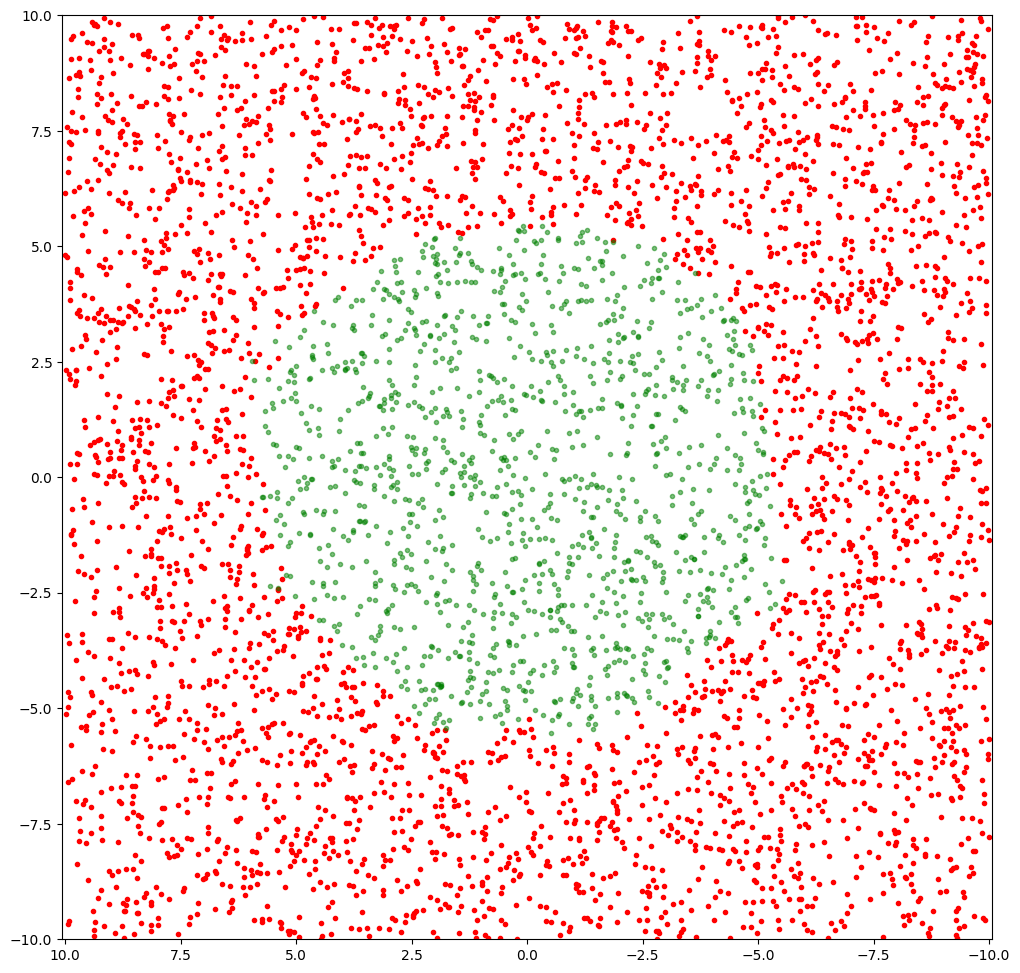

In [5]:
# hence we need to 'unsort' them using their IDs
import matplotlib.pyplot as plt
surv = part.state.copy()
surv[part.particle_id] = part.state

# Plot the surviving particles as green
plt.figure(1,figsize=(12,12))
plt.plot(x_norm[surv<=0], y_norm[surv<=0], '.', color='red')
plt.plot(x_norm[surv>0], y_norm[surv>0], '.', color='green',alpha=0.5)
plt.axis('equal')
plt.axis([n_sigmas, -n_sigmas, -n_sigmas, n_sigmas])
# plt.axis([2.5, -2.5, -2.5, 2.5])
plt.show()

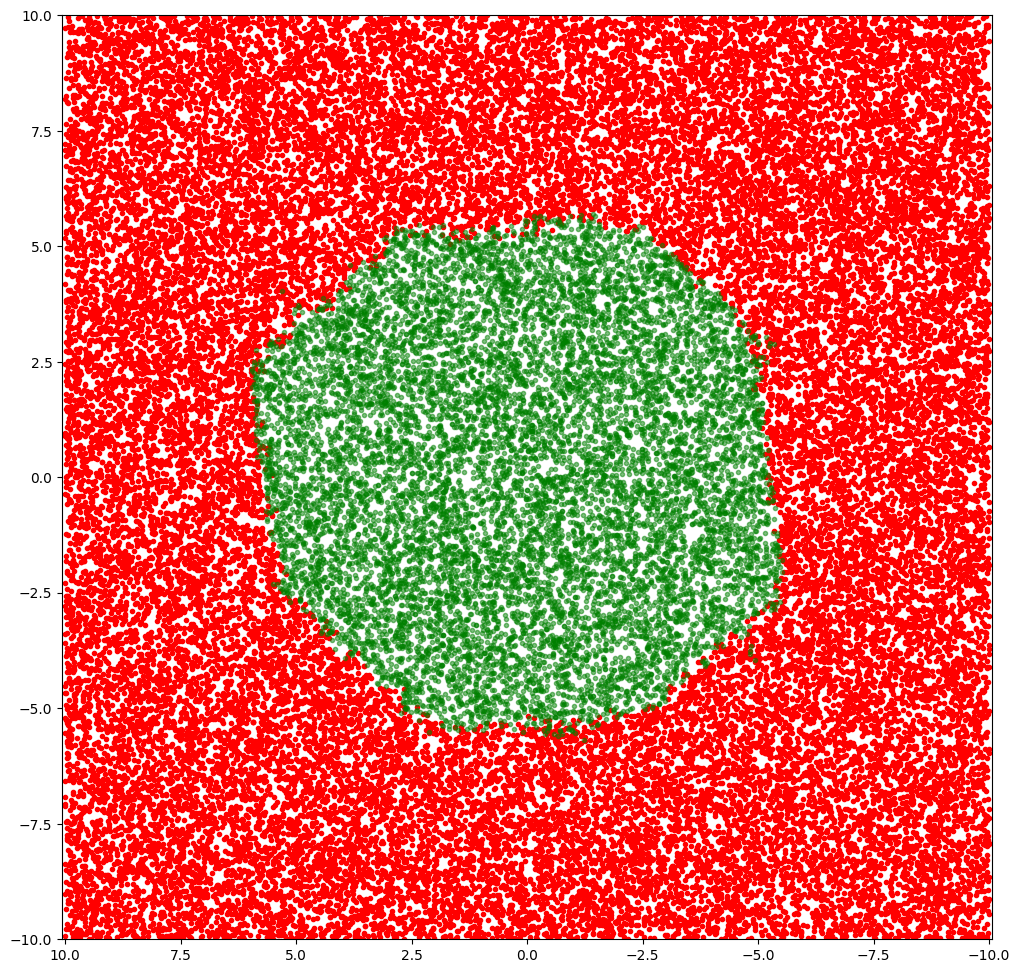

In [97]:
# hence we need to 'unsort' them using their IDs
surv = part.state.copy()
surv[part.particle_id] = part.state

# Plot the surviving particles as green
plt.figure(1,figsize=(12,12))
plt.plot(x_norm[surv<=0], y_norm[surv<=0], '.', color='red')
plt.plot(x_norm[surv>0], y_norm[surv>0], '.', color='green',alpha=0.5)
plt.axis('equal')
plt.axis([n_sigmas, -n_sigmas, -n_sigmas, n_sigmas])
# plt.axis([2.5, -2.5, -2.5, 2.5])
plt.show()

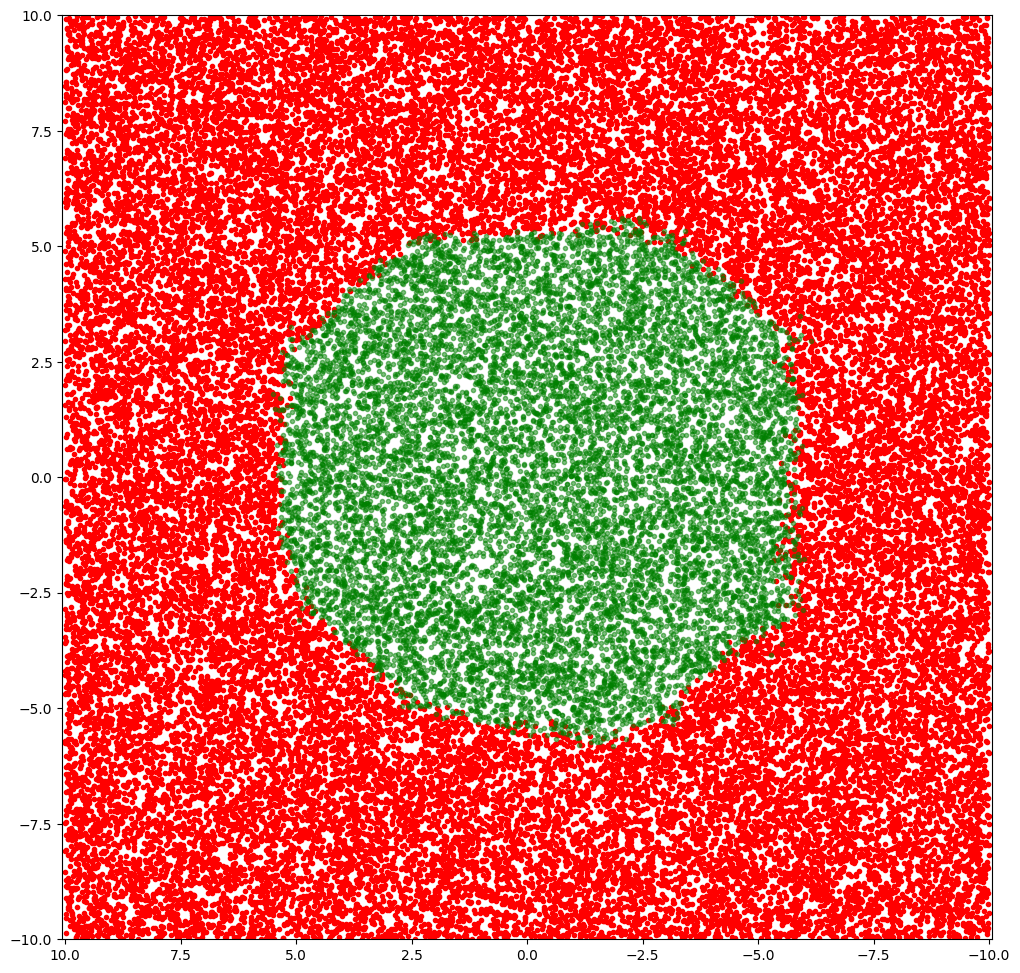

In [21]:
# hence we need to 'unsort' them using their IDs
surv = part.state.copy()
surv[part.particle_id] = part.state

# Plot the surviving particles as green
plt.figure(1,figsize=(12,12))
plt.plot(x_norm[surv<=0], y_norm[surv<=0], '.', color='red')
plt.plot(x_norm[surv>0], y_norm[surv>0], '.', color='green',alpha=0.5)
plt.axis('equal')
plt.axis([n_sigmas, -n_sigmas, -n_sigmas, n_sigmas])
# plt.axis([2.5, -2.5, -2.5, 2.5])
plt.show()

In [15]:
df2 = tracked.df.copy()
df2 = df2[df2['gamma0'] > 0].reset_index(drop=True)
df2 = df2[df2['at_element'] != 0].reset_index(drop=True)
intensity2 = tracked.df.groupby('at_turn').count().state

In [5]:
intensity = tracked.df.groupby('at_turn').count().state

In [19]:
df2.groupby('at_element').count()

,start_tracking_at_element,q0,mass0,s,zeta,chi,charge_ratio,weight,particle_id,at_turn,...,y,px,py,delta,ptau,rvv,rpp,p0c,beta0,gamma0
at_element,,,,,,,,,,,,,,,,,,,,,
52215,15325,15325,15325,15325,15325,15325,15325,15325,15325,15325,...,15325,15325,15325,15325,15325,15325,15325,15325,15325,15325


(120.0, 150.0)

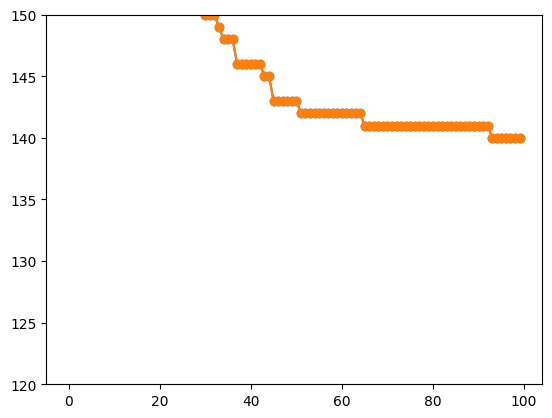

In [16]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(intensity,'-o')
plt.plot(intensity2,'-o')
plt.ylim([120,150])

(-10.0, 200.0)

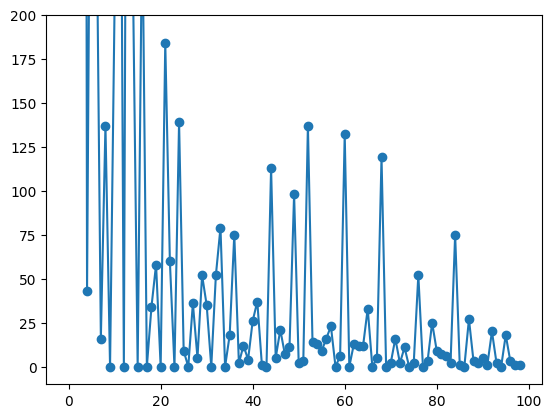

In [19]:
plt.figure()
plt.plot(-np.diff(intensity),'-o')
plt.ylim([-10,200])




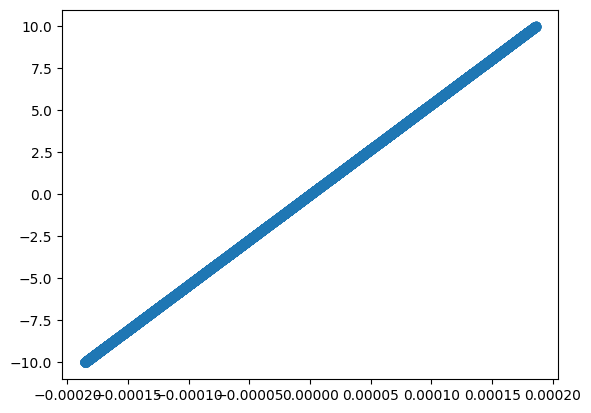

In [20]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(tracked.df.groupby('turn').get_group(0).x_n,x_norm,'o')

In [81]:
tracked.df.groupby('turn').get_group(99).x

100    -0.000568
200    -0.000287
301     0.000546
401    -0.000241
503    -0.000273
639    -0.000433
740    -0.000571
840    -0.000032
940     0.000509
1040    0.000217
1140   -0.000033
1240    0.000041
1340    0.000241
1441   -0.000111
1541   -0.000297
1641    0.000651
1748    0.000009
1850    0.000826
1955    0.000005
2057    0.000290
2157   -0.000610
2259    0.000276
2359   -0.000484
2460    0.000227
2562   -0.000402
Name: x, dtype: float64

In [22]:
import json

import xtrack as xt
import xpart as xp
import xobjects as xo

context = xo.ContextCpu()

# line_path = '/Users/pbelanger/ABPLocal/BBStudies/Executables/py-BB/xtrack/test_data/hllhc15_noerrors_nobb/line_and_particle.json'
line_path = '/Users/pbelanger/ABPLocal/BBStudies/Executables/py-BB/xtrack/test_data/lhc_with_bb/line_and_particle.json'
# line_path = '../../test_data/hllhc15_noerrors_nobb/line_and_particle.json'
with open(line_path) as f:
    dct = json.load(f)
line = xt.Line.from_dict(dct['line'])
line.particle_ref = xp.Particles.from_dict(dct['particle'])





num_particles = 5000
monitor_ip5 = xt.ParticlesMonitor(start_at_turn=0, stop_at_turn=100,
                                    num_particles=num_particles)
monitor_ip8 = xt.ParticlesMonitor(start_at_turn=5, stop_at_turn=15,
                                    num_particles=num_particles)
line.insert_element(index='ip5', element=monitor_ip5, name='mymon5')
line.insert_element(index='ip8', element=monitor_ip8, name='mymon8')

#============================================================
# - ADDING APERTURE
#============================================================

aper_noproblem = xt.LimitRect(  min_x=-5e-2, max_x=5e-2,  
                                min_y=-5e-2, max_y=5e-2)

aper_problem  =  xt.LimitRect(  min_x=-5e-4, max_x=5e-4,  
                                min_y=-5e-4, max_y=5e-4)
line.insert_element(element=aper_problem, name='aperture', index='mymon5')
#============================================================


line.build_tracker()

# particles = xp.generate_matched_gaussian_bunch(line=line,
#                                                num_particles=num_particles,
#                                                nemitt_x=2.5e-6,
#                                                nemitt_y=2.5e-6,
#                                                sigma_z=9e-2,at_element='tcp.d6l7.b1')


import numpy as np
n_sigmas = 100
n_part   = num_particles
x_norm  = np.random.uniform(-n_sigmas, n_sigmas, n_part) 
px_norm = np.random.uniform(-n_sigmas/10, n_sigmas/10, n_part)
y_norm  = np.random.uniform(-n_sigmas, n_sigmas, n_part) 
py_norm = np.random.uniform(-n_sigmas/10, n_sigmas/10, n_part)
particles = xp.build_particles( line =line,
                            x_norm=x_norm,
                            px_norm=px_norm,
                            y_norm=y_norm,
                            py_norm=py_norm,
                            nemitt_x=2.5e-6, nemitt_y=2.5e-6,
                            _context=context,
                            at_element='mymon5')

num_turns = 100
monitor = xt.ParticlesMonitor(_context=context,
                              start_at_turn=0, stop_at_turn=15,
                              num_particles=num_particles)
line.track(particles, num_turns=num_turns,turn_by_turn_monitor=monitor_ip5)

Done loading line from dict.           
Compiling ContextCpu kernels...


75790c59adda4629a7a82813e61ee86c.c:5035:11: warning: '_GNU_SOURCE' macro redefined [-Wmacro-redefined]
#  define _GNU_SOURCE // enable GNU libc NAN extension if possible
          ^
/Users/pbelanger/ABPLocal/BBStudies/Executables/miniforge3/envs/py-BB/include/python3.11/pyconfig.h:1690:10: note: previous definition is here
# define _GNU_SOURCE 1
         ^
75790c59adda4629a7a82813e61ee86c.c:16660:12: warning: variable 'gamma' set but not used [-Wunused-but-set-variable]
    double gamma          = energy / m0;     // [1]
           ^
75790c59adda4629a7a82813e61ee86c.c:16926:9: warning: variable 'i' set but not used [-Wunused-but-set-variable]
    int i=0;
        ^
75790c59adda4629a7a82813e61ee86c.c:17017:12: warning: unused variable 'e_loss_primary_tot' [-Wunused-variable]
    double e_loss_primary_tot = 0.0;  // [GeV] total energy lost by the macroparticle
           ^
75790c59adda4629a7a82813e61ee86c.c:17014:62: warning: variable 'ps_e_prime' set but not used [-Wunused-but-set-varia

Done compiling ContextCpu kernels.


In [23]:
import pandas as pd
df = pd.DataFrame(monitor_ip5.to_dict()['data'])
# df.groupby('state').get_group(1).groupby('at_element').count()


# pd.DataFrame(monitor_ip5.to_dict()['data']).groupby('at_element').count()

In [49]:
df = pd.DataFrame(monitor_ip5.to_dict()['data'])

In [24]:
df[df['state']!=0].groupby('at_turn').count()

,start_tracking_at_element,q0,mass0,s,zeta,chi,charge_ratio,weight,particle_id,at_element,...,y,px,py,delta,ptau,rvv,rpp,p0c,beta0,gamma0
at_turn,,,,,,,,,,,,,,,,,,,,,
0,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,...,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000
1,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,...,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000
2,4459,4459,4459,4459,4459,4459,4459,4459,4459,4459,...,4459,4459,4459,4459,4459,4459,4459,4459,4459,4459
3,3620,3620,3620,3620,3620,3620,3620,3620,3620,3620,...,3620,3620,3620,3620,3620,3620,3620,3620,3620,3620
4,2734,2734,2734,2734,2734,2734,2734,2734,2734,2734,...,2734,2734,2734,2734,2734,2734,2734,2734,2734,2734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1509,1509,1509,1509,1509,1509,1509,1509,1509,1509,...,1509,1509,1509,1509,1509,1509,1509,1509,1509,1509
96,1502,1502,1502,1502,1502,1502,1502,1502,1502,1502,...,1502,1502,1502,1502,1502,1502,1502,1502,1502,1502
97,1501,1501,1501,1501,1501,1501,1501,1501,1501,1501,...,1501,1501,1501,1501,1501,1501,1501,1501,1501,1501


In [25]:
df.groupby('state').get_group(0).mean()

start_tracking_at_element    0.0
q0                           0.0
mass0                        0.0
s                            0.0
zeta                         0.0
chi                          0.0
charge_ratio                 0.0
weight                       0.0
particle_id                  0.0
at_element                   0.0
at_turn                      0.0
state                        0.0
parent_particle_id           0.0
_rng_s1                      0.0
_rng_s2                      0.0
_rng_s3                      0.0
_rng_s4                      0.0
x                            0.0
y                            0.0
px                           0.0
py                           0.0
delta                        0.0
ptau                         0.0
rvv                          0.0
rpp                          0.0
p0c                          0.0
beta0                        0.0
gamma0                       0.0
dtype: float64

In [18]:
df.groupby('at_element').get_group(0).mean()

start_tracking_at_element    0.0
q0                           0.0
mass0                        0.0
s                            0.0
zeta                         0.0
chi                          0.0
charge_ratio                 0.0
weight                       0.0
particle_id                  0.0
at_element                   0.0
at_turn                      0.0
state                        0.0
parent_particle_id           0.0
_rng_s1                      0.0
_rng_s2                      0.0
_rng_s3                      0.0
_rng_s4                      0.0
x                            0.0
y                            0.0
px                           0.0
py                           0.0
delta                        0.0
ptau                         0.0
rvv                          0.0
rpp                          0.0
p0c                          0.0
beta0                        0.0
gamma0                       0.0
dtype: float64

In [19]:
df.groupby('at_turn').count()

,start_tracking_at_element,q0,mass0,s,zeta,chi,charge_ratio,weight,particle_id,at_element,...,y,px,py,delta,ptau,rvv,rpp,p0c,beta0,gamma0
at_turn,,,,,,,,,,,,,,,,,,,,,
0,329119,329119,329119,329119,329119,329119,329119,329119,329119,329119,...,329119,329119,329119,329119,329119,329119,329119,329119,329119,329119
1,2541,2541,2541,2541,2541,2541,2541,2541,2541,2541,...,2541,2541,2541,2541,2541,2541,2541,2541,2541,2541
2,2541,2541,2541,2541,2541,2541,2541,2541,2541,2541,...,2541,2541,2541,2541,2541,2541,2541,2541,2541,2541
3,2441,2441,2441,2441,2441,2441,2441,2441,2441,2441,...,2441,2441,2441,2441,2441,2441,2441,2441,2441,2441
4,2354,2354,2354,2354,2354,2354,2354,2354,2354,2354,...,2354,2354,2354,2354,2354,2354,2354,2354,2354,2354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1465,1465,1465,1465,1465,1465,1465,1465,1465,1465,...,1465,1465,1465,1465,1465,1465,1465,1465,1465,1465
96,1463,1463,1463,1463,1463,1463,1463,1463,1463,1463,...,1463,1463,1463,1463,1463,1463,1463,1463,1463,1463
97,1461,1461,1461,1461,1461,1461,1461,1461,1461,1461,...,1461,1461,1461,1461,1461,1461,1461,1461,1461,1461


In [47]:
pd.DataFrame(monitor_ip8.to_dict()['data']).groupby('at_turn').count()

,start_tracking_at_element,q0,mass0,s,zeta,chi,charge_ratio,weight,particle_id,at_element,...,y,px,py,delta,ptau,rvv,rpp,p0c,beta0,gamma0
at_turn,,,,,,,,,,,,,,,,,,,,,
0,61,61,61,61,61,61,61,61,61,61,...,61,61,61,61,61,61,61,61,61,61
5,46,46,46,46,46,46,46,46,46,46,...,46,46,46,46,46,46,46,46,46,46
6,46,46,46,46,46,46,46,46,46,46,...,46,46,46,46,46,46,46,46,46,46
7,45,45,45,45,45,45,45,45,45,45,...,45,45,45,45,45,45,45,45,45,45
8,45,45,45,45,45,45,45,45,45,45,...,45,45,45,45,45,45,45,45,45,45
9,43,43,43,43,43,43,43,43,43,43,...,43,43,43,43,43,43,43,43,43,43
10,43,43,43,43,43,43,43,43,43,43,...,43,43,43,43,43,43,43,43,43,43
11,43,43,43,43,43,43,43,43,43,43,...,43,43,43,43,43,43,43,43,43,43
12,43,43,43,43,43,43,43,43,43,43,...,43,43,43,43,43,43,43,43,43,43


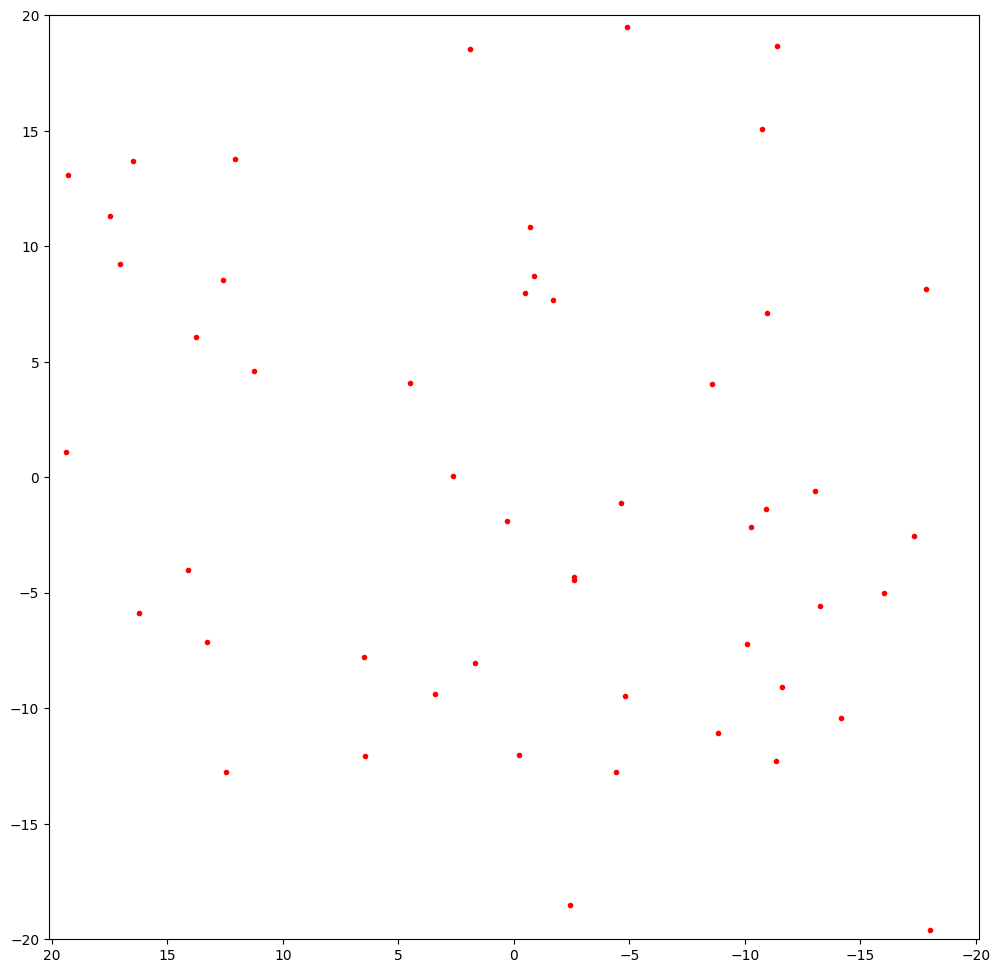

In [32]:
# hence we need to 'unsort' them using their IDs
import matplotlib.pyplot as plt
surv = particles.state.copy()
surv[particles.particle_id] = particles.state

# Plot the surviving particles as green
plt.figure(1,figsize=(12,12))
plt.plot(x_norm[surv<=0], y_norm[surv<=0], '.', color='red')
plt.plot(x_norm[surv>0], y_norm[surv>0], '.', color='green',alpha=0.5)
plt.axis('equal')
plt.axis([n_sigmas, -n_sigmas, -n_sigmas, n_sigmas])
# plt.axis([2.5, -2.5, -2.5, 2.5])
plt.show()

In [27]:
tracked.df.groupby('turn').get_group(99).particle

199      1
299      2
499      4
599      5
899      8
1499    14
1699    16
1799    17
1899    18
1999    19
2099    20
2199    21
2299    22
2499    24
2599    25
2699    26
3099    30
3399    33
3699    36
3999    39
4099    40
4399    43
4499    44
4699    46
4999    49
Name: particle, dtype: int64

In [14]:
import numpy as np

import xobjects as xo
import xtrack as xt
import xpart as xp
import pandas as pd

## Generate a simple line
line = xt.Line(
    elements=[xt.Drift(length=2.),
              xt.Multipole(knl=[0, 1.], ksl=[0,0]),
              xt.Drift(length=1.),
              xt.Multipole(knl=[0, -1.], ksl=[0,0])],
    element_names=['drift_0', 'quad_0', 'drift_1', 'quad_1'])

## Attach a reference particle to the line (optional)
## (defines the reference mass, charge and energy)
line.particle_ref = xp.Particles(p0c=6500e9, #eV
                                 q0=1, mass0=xp.PROTON_MASS_EV)





#============================================================
# - ADDING APERTURE
#============================================================

aper_1 = xt.LimitRect(  min_x=-1e-3, max_x=1e-3,  
                        min_y=-2e-3, max_y=2e-3)
line.insert_element(element=aper_1, name='aperture', index='drift_1')
#============================================================


## Choose a context
context = xo.ContextCpu()         # For CPU
# context = xo.ContextCupy()      # For CUDA GPUs
# context = xo.ContextPyopencl()  # For OpenCL GPUs

## Transfer lattice on context and compile tracking code
line.build_tracker(_context=context)

## Build particle object on context
n_part = 200
particles = xp.Particles(p0c=6500e9, #eV
                        q0=1, mass0=xp.PROTON_MASS_EV,
                        x=np.random.uniform(-1e-3, 1e-3, n_part),
                        px=np.random.uniform(-1e-5, 1e-5, n_part),
                        y=np.random.uniform(-2e-3, 2e-3, n_part),
                        py=np.random.uniform(-3e-5, 3e-5, n_part),
                        zeta=np.random.uniform(-1e-2, 1e-2, n_part),
                        delta=np.random.uniform(-1e-4, 1e-4, n_part),
                        _context=context)

## Track (saving turn-by-turn data)
n_turns = 100
line.track(particles, num_turns=n_turns,
              turn_by_turn_monitor=True)




## Turn-by-turn data is available at:
# line.record_last_track.x
# line.record_last_track.px

# One can see that there are thousands of particles with at_turn=0
print(np.bincount(line.record_last_track.to_dict()['data']['at_turn']))

# Or via dataframe:
df = pd.DataFrame(line.record_last_track.to_dict()['data'])
print(df.groupby('at_turn').count())



Compiling ContextCpu kernels...


ld: warning: -pie being ignored. It is only used when linking a main executable


Done compiling ContextCpu kernels.
[10201   195    98    98    98    98    98    98    98    98    98    98
    98    98    98    98    98    98    98    98    98    98    98    98
    98    98    98    98    98    98    98    98    98    98    98    98
    98    98    98    98    98    98    98    98    98    98    98    98
    98    98    98    98    98    98    98    98    98    98    98    98
    98    98    98    98    98    98    98    98    98    98    98    98
    98    98    98    98    98    98    98    98    98    98    98    98
    98    98    98    98    98    98    98    98    98    98    98    98
    98    98    98    98]
         start_tracking_at_element     q0  mass0      s   zeta    chi  \
at_turn                                                                 
0                            10201  10201  10201  10201  10201  10201   
1                              195    195    195    195    195    195   
2                               98     98     98     98     98 

In [8]:
import pandas as pd
df = pd.DataFrame(line.record_last_track.to_dict()['data'])
df.groupby('at_turn').count()

,start_tracking_at_element,q0,mass0,s,zeta,chi,charge_ratio,weight,particle_id,at_element,...,y,px,py,delta,ptau,rvv,rpp,p0c,beta0,gamma0
at_turn,,,,,,,,,,,,,,,,,,,,,
0,9645,9645,9645,9645,9645,9645,9645,9645,9645,9645,...,9645,9645,9645,9645,9645,9645,9645,9645,9645,9645
1,197,197,197,197,197,197,197,197,197,197,...,197,197,197,197,197,197,197,197,197,197
2,104,104,104,104,104,104,104,104,104,104,...,104,104,104,104,104,104,104,104,104,104
3,104,104,104,104,104,104,104,104,104,104,...,104,104,104,104,104,104,104,104,104,104
4,104,104,104,104,104,104,104,104,104,104,...,104,104,104,104,104,104,104,104,104,104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,103,103,103,103,103,103,103,103,103,103,...,103,103,103,103,103,103,103,103,103,103
96,103,103,103,103,103,103,103,103,103,103,...,103,103,103,103,103,103,103,103,103,103
97,103,103,103,103,103,103,103,103,103,103,...,103,103,103,103,103,103,103,103,103,103


In [12]:
np.bincount(line.record_last_track.to_dict()['data']['at_turn'])

array([9645,  197,  104,  104,  104,  104,  104,  104,  104,  104,  104,
        104,  104,  104,  104,  104,  104,  104,  104,  104,  104,  104,
        104,  104,  104,  104,  104,  104,  104,  104,  104,  104,  104,
        104,  104,  104,  104,  104,  104,  104,  104,  104,  104,  104,
        104,  104,  104,  104,  104,  104,  104,  104,  104,  104,  104,
        104,  104,  104,  104,  104,  104,  104,  104,  104,  104,  104,
        103,  103,  103,  103,  103,  103,  103,  103,  103,  103,  103,
        103,  103,  103,  103,  103,  103,  103,  103,  103,  103,  103,
        103,  103,  103,  103,  103,  103,  103,  103,  103,  103,  103,
        103])

In [6]:
df.groupby('at_turn').count()

,start_tracking_at_element,q0,mass0,s,zeta,chi,charge_ratio,weight,particle_id,at_element,...,y,px,py,delta,ptau,rvv,rpp,p0c,beta0,gamma0
at_turn,,,,,,,,,,,,,,,,,,,,,
0,200,200,200,200,200,200,200,200,200,200,...,200,200,200,200,200,200,200,200,200,200
1,200,200,200,200,200,200,200,200,200,200,...,200,200,200,200,200,200,200,200,200,200
2,200,200,200,200,200,200,200,200,200,200,...,200,200,200,200,200,200,200,200,200,200
3,200,200,200,200,200,200,200,200,200,200,...,200,200,200,200,200,200,200,200,200,200
4,200,200,200,200,200,200,200,200,200,200,...,200,200,200,200,200,200,200,200,200,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,200,200,200,200,200,200,200,200,200,200,...,200,200,200,200,200,200,200,200,200,200
96,200,200,200,200,200,200,200,200,200,200,...,200,200,200,200,200,200,200,200,200,200
97,200,200,200,200,200,200,200,200,200,200,...,200,200,200,200,200,200,200,200,200,200


In [1]:
import numpy as np

import xobjects as xo
import xtrack as xt
import xpart as xp
import pandas as pd

## Generate a simple line
line = xt.Line(
    elements=[xt.Drift(length=2.),
              xt.Multipole(knl=[0, 1.], ksl=[0,0]),
              xt.Drift(length=1.),
              xt.Multipole(knl=[0, -1.], ksl=[0,0])],
    element_names=['drift_0', 'quad_0', 'drift_1', 'quad_1'])

## Attach a reference particle to the line (optional)
## (defines the reference mass, charge and energy)
line.particle_ref = xp.Particles(p0c=6500e9, #eV
                                 q0=1, mass0=xp.PROTON_MASS_EV)





#============================================================
# - ADDING APERTURE
#============================================================

aper_1 = xt.LimitRect(  min_x=-1e-3, max_x=1e-3,  
                        min_y=-2e-3, max_y=2e-3)
line.insert_element(element=aper_1, name='aperture', index='drift_1')
#============================================================


## Choose a context
context = xo.ContextCpu()         # For CPU
# context = xo.ContextCupy()      # For CUDA GPUs
# context = xo.ContextPyopencl()  # For OpenCL GPUs

## Transfer lattice on context and compile tracking code
line.build_tracker(_context=context)

## Build particle object on context
n_part = 200
particles = xp.Particles(p0c=6500e9, #eV
                        q0=1, mass0=xp.PROTON_MASS_EV,
                        x=np.random.uniform(-1e-3, 1e-3, n_part),
                        px=np.random.uniform(-1e-5, 1e-5, n_part),
                        y=np.random.uniform(-2e-3, 2e-3, n_part),
                        py=np.random.uniform(-3e-5, 3e-5, n_part),
                        zeta=np.random.uniform(-1e-2, 1e-2, n_part),
                        delta=np.random.uniform(-1e-4, 1e-4, n_part),
                        _context=context)

## Track (saving turn-by-turn data)
n_turns = 100
line.track(particles, num_turns=n_turns,
              turn_by_turn_monitor=True)




## Turn-by-turn data is available at:
# line.record_last_track.x
# line.record_last_track.px

# One can see that there are thousands of particles with at_turn=0
print(np.bincount(line.record_last_track.to_dict()['data']['at_turn']))

# Or via dataframe:
df = pd.DataFrame(line.record_last_track.to_dict()['data'])
print(df.groupby('at_turn').count())



Compiling ContextCpu kernels...


ld: warning: -pie being ignored. It is only used when linking a main executable


Done compiling ContextCpu kernels.
[10687   199    93    93    93    93    93    93    93    93    93    93
    93    93    93    93    93    93    93    93    93    93    93    93
    93    93    93    93    93    93    93    93    93    93    93    93
    93    93    93    93    93    93    93    93    93    93    93    93
    93    93    93    93    93    93    93    93    93    93    93    93
    93    93    93    93    93    93    93    93    93    93    93    93
    93    93    93    93    93    93    93    93    93    93    93    93
    93    93    93    93    93    93    93    93    93    93    93    93
    93    93    93    93]
         start_tracking_at_element     q0  mass0      s   zeta    chi  \
at_turn                                                                 
0                            10687  10687  10687  10687  10687  10687   
1                              199    199    199    199    199    199   
2                               93     93     93     93     93 

In [5]:
df[df.state != 0].gamma0.mean()

6927.628083302592

In [19]:
rich.inspect(collider['lhcb1'].element_dict['tcp.c6l7.b1_aper'])

╭───────────────────────────── <class 'xtrack.beam_elements.apertures.LimitPolygon'> ─────────────────────────────╮
│ Beam element modeling a polygonal aperture limit.                                                               │
│                                                                                                                 │
│ ╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────╮ │
│ │ LimitPolygon(x_vertices=[ 0.001301  0.001301 -0.001301 -0.001301], y_vertices=[-1.  1.  1. -1.],            │ │
│ │ x_normal=[-1. -0.  1. -0.], y_normal=[ 0. -1.  0.  1.], resc_fac=1.0)                                       │ │
│ ╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────╯ │
│                                                                                                                 │
│                  allow_backtrack = False                                                                        │
│                             area = 0.005204                                                                     │
│               behaves_like_drift = False                                                                        │
│                         centroid = (0.0, 0.0)                                                                   │
│                          context = <xobjects.context_cpu.ContextCpu object at 0x12ed69ad0>                      │
│                    extra_sources = NameError('`extra_sources` has been removed. Use `_extra_c_sources`          │
│                                    instead.')                                                                   │
│                    has_backtrack = True                                                                         │
│                     iscollective = None                                                                         │
│                          isthick = False                                                                        │
│                         resc_fac = 1.0                                                                          │
│ skip_in_loss_location_refinement = False                                                                        │
│                         x_closed = array([ 0.001301,  0.001301, -0.001301, -0.001301,  0.001301])               │
│                         x_normal = array([-1., -0.,  1., -0.])                                                  │
│                       x_vertices = array([ 0.001301,  0.001301, -0.001301, -0.001301])                          │
│                         XoStruct = NameError('`XoStruct` has been removed. Use `_XoStruct` instead.')           │
│                         y_closed = array([-1.,  1.,  1., -1., -1.])                                             │
│                         y_normal = array([ 0., -1.,  0.,  1.])                                                  │
│                       y_vertices = array([-1.,  1.,  1., -1.])                                                  │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

In [9]:
part.to_pandas()['state']

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    1
21    1
22    1
23    1
24    1
25    1
26    1
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
Name: state, dtype: int64

In [4]:
df.groupby('at_element').count()

,start_tracking_at_element,q0,mass0,s,zeta,chi,charge_ratio,weight,particle_id,at_turn,...,y,px,py,delta,ptau,rvv,rpp,p0c,beta0,gamma0
at_element,,,,,,,,,,,,,,,,,,,,,
0,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,...,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000


In [8]:
df.groupby('particle_id').get_group(2)

,start_tracking_at_element,q0,mass0,s,zeta,chi,charge_ratio,weight,particle_id,at_element,...,y,px,py,delta,ptau,rvv,rpp,p0c,beta0,gamma0
200,0,0.0,0.0,13124.4636,5.518675e-06,1.0,1.0,0.0,2,52214,...,-1.020743e-06,-4.304469e-08,-2.085819e-08,0.000001,0.000001,1.0,0.999999,6.800000e+12,1.0,7247.364689
201,0,0.0,0.0,0.0000,9.134051e-07,1.0,1.0,0.0,2,0,...,1.662147e-06,3.365781e-07,2.428107e-08,0.000001,0.000001,1.0,0.999999,6.800000e+12,1.0,7247.364689
202,0,0.0,0.0,0.0000,1.275112e-06,1.0,1.0,0.0,2,0,...,3.526541e-07,-2.828636e-08,-4.835728e-09,0.000001,0.000001,1.0,0.999999,6.800000e+12,1.0,7247.364689
203,0,0.0,0.0,0.0000,1.472732e-06,1.0,1.0,0.0,2,0,...,-2.000979e-06,-3.385974e-07,-2.321418e-08,0.000001,0.000001,1.0,0.999999,6.800000e+12,1.0,7247.364689
204,0,0.0,0.0,0.0000,9.882980e-07,1.0,1.0,0.0,2,0,...,7.810839e-07,2.196326e-07,1.738860e-08,0.000001,0.000001,1.0,0.999999,6.800000e+12,1.0,7247.364689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0,0.0,0.0,0.0000,1.182552e-06,1.0,1.0,0.0,2,0,...,9.695222e-07,9.063738e-08,3.691315e-09,0.000001,0.000001,1.0,0.999999,6.800000e+12,1.0,7247.364689
296,0,0.0,0.0,0.0000,1.516424e-06,1.0,1.0,0.0,2,0,...,-1.967585e-06,-3.629710e-07,-2.586038e-08,0.000001,0.000001,1.0,0.999999,6.800000e+12,1.0,7247.364689
297,0,0.0,0.0,0.0000,1.075845e-06,1.0,1.0,0.0,2,0,...,1.437838e-07,1.158035e-07,1.052539e-08,0.000001,0.000001,1.0,0.999999,6.800000e+12,1.0,7247.364689
298,0,0.0,0.0,0.0000,1.016712e-06,1.0,1.0,0.0,2,0,...,1.758351e-06,2.709427e-07,1.734104e-08,0.000001,0.000001,1.0,0.999999,6.800000e+12,1.0,7247.364689


In [7]:
test = collider[seq].record_last_track.to_dict()['data']

In [12]:
test['at_turn']

array([ 0,  1,  2, ..., 97, 98, 99])

In [11]:
len(test['at_turn'])

5000

In [15]:
part.to_pandas()

,start_tracking_at_element,q0,mass0,s,zeta,chi,charge_ratio,weight,particle_id,at_element,...,y,px,py,delta,ptau,rvv,rpp,p0c,beta0,gamma0
0,-1,1.0,9.382721e+08,0.0000,1.889227e-06,1.0,1.0,0.0,0,0,...,0.000040,3.897236e-06,7.784978e-07,0.000001,0.000001,1.0,0.999999,6.800000e+12,1.0,7247.364689
1,-1,1.0,9.382721e+08,0.0000,3.371739e-05,1.0,1.0,0.0,1,0,...,0.000010,-1.131533e-05,-2.016920e-06,0.000001,0.000001,1.0,0.999999,6.800000e+12,1.0,7247.364689
2,-1,1.0,9.382721e+08,0.0000,3.615798e-05,1.0,1.0,0.0,2,0,...,-0.000153,-1.477423e-05,-3.781029e-06,0.000001,0.000001,1.0,0.999999,6.800000e+12,1.0,7247.364689
3,-1,1.0,9.382721e+08,0.0000,9.741035e-06,1.0,1.0,0.0,3,0,...,-0.000033,-4.168978e-06,-6.303271e-07,0.000001,0.000001,1.0,0.999999,6.800000e+12,1.0,7247.364689
4,-1,1.0,9.382721e+08,0.0000,1.295431e-06,1.0,1.0,0.0,49,0,...,0.000049,4.821458e-06,8.721047e-07,0.000001,0.000001,1.0,0.999999,6.800000e+12,1.0,7247.364689
5,-1,1.0,9.382721e+08,0.0000,1.487920e-06,1.0,1.0,0.0,45,0,...,0.000027,3.171928e-06,5.489758e-07,0.000001,0.000001,1.0,0.999999,6.800000e+12,1.0,7247.364689
6,-1,1.0,9.382721e+08,0.0000,-2.396610e-07,1.0,1.0,0.0,6,0,...,0.000011,2.081842e-06,1.468902e-07,0.000001,0.000001,1.0,0.999999,6.800000e+12,1.0,7247.364689
7,-1,1.0,9.382721e+08,0.0000,3.660551e-05,1.0,1.0,0.0,7,0,...,-0.000083,-1.415805e-05,-3.167986e-06,0.000001,0.000001,1.0,0.999999,6.800000e+12,1.0,7247.364689
8,-1,1.0,9.382721e+08,0.0000,4.024559e-05,1.0,1.0,0.0,8,0,...,-0.000102,-1.596014e-05,-3.674992e-06,0.000001,0.000001,1.0,0.999999,6.800000e+12,1.0,7247.364689
9,-1,1.0,9.382721e+08,0.0000,1.412040e-06,1.0,1.0,0.0,9,0,...,0.000025,3.688746e-06,1.709560e-07,0.000001,0.000001,1.0,0.999999,6.800000e+12,1.0,7247.364689


In [13]:
2525/25

101.0

In [6]:
df.groupby('at_turn').count()

,start_tracking_at_element,q0,mass0,s,zeta,chi,charge_ratio,weight,particle_id,at_element,...,y,px,py,delta,ptau,rvv,rpp,p0c,beta0,gamma0
at_turn,,,,,,,,,,,,,,,,,,,,,
0,2525,2525,2525,2525,2525,2525,2525,2525,2525,2525,...,2525,2525,2525,2525,2525,2525,2525,2525,2525,2525
1,25,25,25,25,25,25,25,25,25,25,...,25,25,25,25,25,25,25,25,25,25
2,25,25,25,25,25,25,25,25,25,25,...,25,25,25,25,25,25,25,25,25,25
3,25,25,25,25,25,25,25,25,25,25,...,25,25,25,25,25,25,25,25,25,25
4,25,25,25,25,25,25,25,25,25,25,...,25,25,25,25,25,25,25,25,25,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,25,25,25,25,25,25,25,25,25,25,...,25,25,25,25,25,25,25,25,25,25
96,25,25,25,25,25,25,25,25,25,25,...,25,25,25,25,25,25,25,25,25,25
97,25,25,25,25,25,25,25,25,25,25,...,25,25,25,25,25,25,25,25,25,25


In [90]:
part0 = tracked.df.groupby('particle_id').get_group(0)
part1 = tracked.df.groupby('particle_id').get_group(1)

_part0 = _tracked.df.groupby('particle_id').get_group(0)
# _part1 = _tracked.df.groupby('particle_id').get_group(1)

In [8]:
_tracked.df.groupby('at_turn').count()

,start_tracking_at_element,q0,mass0,s,zeta,chi,charge_ratio,weight,particle_id,at_element,...,y,px,py,delta,ptau,rvv,rpp,p0c,beta0,gamma0
at_turn,,,,,,,,,,,,,,,,,,,,,
0,2809,2809,2809,2809,2809,2809,2809,2809,2809,2809,...,2809,2809,2809,2809,2809,2809,2809,2809,2809,2809
1,24,24,24,24,24,24,24,24,24,24,...,24,24,24,24,24,24,24,24,24,24
2,24,24,24,24,24,24,24,24,24,24,...,24,24,24,24,24,24,24,24,24,24
3,24,24,24,24,24,24,24,24,24,24,...,24,24,24,24,24,24,24,24,24,24
4,24,24,24,24,24,24,24,24,24,24,...,24,24,24,24,24,24,24,24,24,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,22,22,22,22,22,22,22,22,22,22,...,22,22,22,22,22,22,22,22,22,22
96,22,22,22,22,22,22,22,22,22,22,...,22,22,22,22,22,22,22,22,22,22
97,22,22,22,22,22,22,22,22,22,22,...,22,22,22,22,22,22,22,22,22,22


In [3]:
part.to_pandas()

,start_tracking_at_element,q0,mass0,s,zeta,chi,charge_ratio,weight,particle_id,at_element,...,y,px,py,delta,ptau,rvv,rpp,p0c,beta0,gamma0
0,52215,1.0,9.382721e+08,13124.4636,0.000005,1.0,1.0,0.0,0,52215,...,-5.728844e-05,1.731370e-05,5.625805e-08,0.000001,0.000001,1.0,0.999999,6.800000e+12,1.0,7247.364689
1,52215,1.0,9.382721e+08,13124.4636,0.000005,1.0,1.0,0.0,1,52215,...,-3.323125e-05,8.315436e-06,-7.327424e-08,0.000001,0.000001,1.0,0.999999,6.800000e+12,1.0,7247.364689
2,52215,1.0,9.382721e+08,13124.4636,0.000006,1.0,1.0,0.0,2,52215,...,4.484098e-05,-1.047966e-05,1.434096e-07,0.000001,0.000001,1.0,0.999999,6.800000e+12,1.0,7247.364689
3,52215,1.0,9.382721e+08,13124.4636,0.000005,1.0,1.0,0.0,3,52215,...,-9.457243e-05,2.497695e-05,-1.275654e-07,0.000001,0.000001,1.0,0.999999,6.800000e+12,1.0,7247.364689
4,52215,1.0,9.382721e+08,13124.4636,0.000005,1.0,1.0,0.0,4,52215,...,-3.450165e-05,1.050421e-05,3.846397e-08,0.000001,0.000001,1.0,0.999999,6.800000e+12,1.0,7247.364689
5,52215,1.0,9.382721e+08,13124.4636,0.000005,1.0,1.0,0.0,5,52215,...,-8.378613e-05,2.134438e-05,-1.610402e-07,0.000001,0.000001,1.0,0.999999,6.800000e+12,1.0,7247.364689
6,52215,1.0,9.382721e+08,13124.4636,0.000005,1.0,1.0,0.0,6,52215,...,-6.334642e-05,1.648763e-05,-1.003994e-07,0.000001,0.000001,1.0,0.999999,6.800000e+12,1.0,7247.364689
7,52215,1.0,9.382721e+08,13124.4636,0.000006,1.0,1.0,0.0,7,52215,...,-4.904891e-05,1.748710e-05,2.111661e-07,0.000001,0.000001,1.0,0.999999,6.800000e+12,1.0,7247.364689
8,52215,1.0,9.382721e+08,13124.4636,0.000006,1.0,1.0,0.0,8,52215,...,5.480573e-05,-1.969390e-05,-2.461352e-07,0.000001,0.000001,1.0,0.999999,6.800000e+12,1.0,7247.364689
9,52215,1.0,9.382721e+08,13124.4636,0.000005,1.0,1.0,0.0,9,52215,...,-2.006485e-05,2.677732e-06,-1.878125e-07,0.000001,0.000001,1.0,0.999999,6.800000e+12,1.0,7247.364689


In [63]:
part0

,start_tracking_at_element,q0,mass0,s,zeta,chi,charge_ratio,weight,particle_id,at_element,...,y,px,py,delta,ptau,rvv,rpp,p0c,beta0,gamma0
0,0,0.0,0.0,13124.4636,0.000005,1.0,1.0,0.0,0,52215,...,-0.000077,0.000022,-2.048931e-08,0.000001,0.000001,1.0,0.999999,6.800000e+12,1.0,7247.364689
1,0,0.0,0.0,0.0000,0.000000,0.0,0.0,0.0,0,0,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.0,0.000000,0.000000e+00,0.0,0.000000
2,0,0.0,0.0,0.0000,0.000000,0.0,0.0,0.0,0,0,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.0,0.000000,0.000000e+00,0.0,0.000000
3,0,0.0,0.0,0.0000,0.000000,0.0,0.0,0.0,0,0,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.0,0.000000,0.000000e+00,0.0,0.000000
4,0,0.0,0.0,0.0000,0.000000,0.0,0.0,0.0,0,0,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.0,0.000000,0.000000e+00,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4695,0,0.0,0.0,0.0000,0.000000,0.0,0.0,0.0,0,0,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.0,0.000000,0.000000e+00,0.0,0.000000
4696,0,0.0,0.0,0.0000,0.000000,0.0,0.0,0.0,0,0,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.0,0.000000,0.000000e+00,0.0,0.000000
4697,0,0.0,0.0,0.0000,0.000000,0.0,0.0,0.0,0,0,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.0,0.000000,0.000000e+00,0.0,0.000000
4698,0,0.0,0.0,0.0000,0.000000,0.0,0.0,0.0,0,0,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.0,0.000000,0.000000e+00,0.0,0.000000


In [71]:
line.record_last_track.to_dict()['data']

{'start_tracking_at_element': 0,
 'q0': 0.0,
 'mass0': 0.0,
 's': array([0., 0., 0., ..., 0., 0., 0.]),
 'zeta': array([0., 0., 0., ..., 0., 0., 0.]),
 'chi': array([0., 0., 0., ..., 0., 0., 0.]),
 'charge_ratio': array([0., 0., 0., ..., 0., 0., 0.]),
 'weight': array([0., 0., 0., ..., 0., 0., 0.]),
 'particle_id': array([0, 0, 0, ..., 0, 0, 0]),
 'at_element': array([0, 0, 0, ..., 0, 0, 0]),
 'at_turn': array([0, 0, 0, ..., 0, 0, 0]),
 'state': array([0, 0, 0, ..., 0, 0, 0]),
 'parent_particle_id': array([0, 0, 0, ..., 0, 0, 0]),
 '_rng_s1': array([0, 0, 0, ..., 0, 0, 0], dtype=uint32),
 '_rng_s2': array([0, 0, 0, ..., 0, 0, 0], dtype=uint32),
 '_rng_s3': array([0, 0, 0, ..., 0, 0, 0], dtype=uint32),
 '_rng_s4': array([0, 0, 0, ..., 0, 0, 0], dtype=uint32),
 'x': array([0., 0., 0., ..., 0., 0., 0.]),
 'y': array([0., 0., 0., ..., 0., 0., 0.]),
 'px': array([0., 0., 0., ..., 0., 0., 0.]),
 'py': array([0., 0., 0., ..., 0., 0., 0.]),
 'delta': LinkedArrayCpu([0., 0., 0., ..., 0., 0., 0.

In [81]:
part.to_dict()['at_element']

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0, 52231,
       52231, 52231, 52231, 52231, 52231, 52231, 52231, 52231, 52231,
       52231, 52231, 52231, 52231, 52231, 52231, 52231, 52231, 52231,
       52231, 52231, 52231, 52231, 52231])

In [77]:
part.to_pandas().groupby('start_tracking_at_element').count()

,q0,mass0,s,zeta,chi,charge_ratio,weight,particle_id,at_element,at_turn,...,y,px,py,delta,ptau,rvv,rpp,p0c,beta0,gamma0
start_tracking_at_element,,,,,,,,,,,,,,,,,,,,,
-1,50,50,50,50,50,50,50,50,50,50,...,50,50,50,50,50,50,50,50,50,50


In [73]:
df

,start_tracking_at_element,q0,mass0,s,zeta,chi,charge_ratio,weight,particle_id,at_element,...,y,px,py,delta,ptau,rvv,rpp,p0c,beta0,gamma0
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4895,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4896,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4897,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4898,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
line.vars['on_x1']._

Warning! The argument tracker is deprecated. Please use line instead.
Warning! scale_with_transverse_norm_emitt is deprecated. Use nemitt_x and nemitt_y instead.
Tracking first test.. 


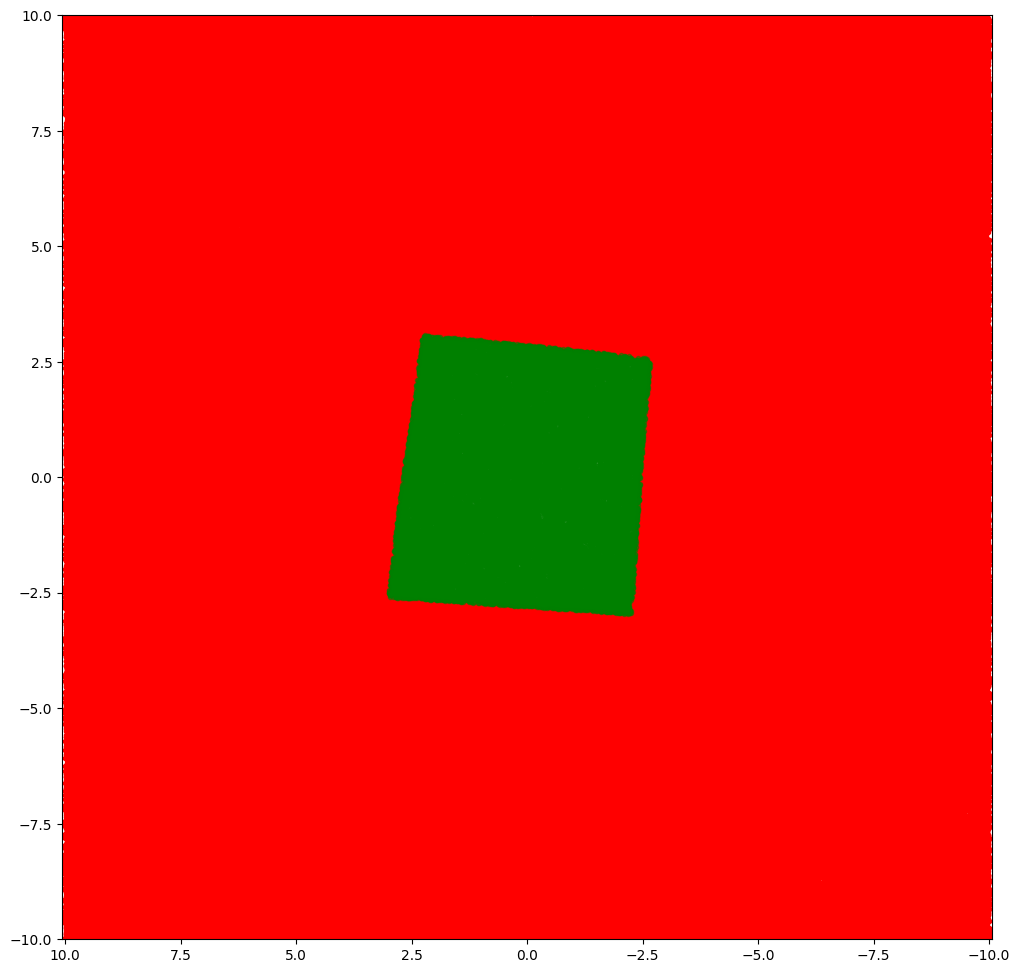

In [6]:
# --------------------------------------------------------
# ------------------ Tracking (test 1) -------------------
# --------------------------------------------------------
#
# As a first test, we just track 5 turns.
# We expect to see the transversal profile generated by
# the three primaries opened at 5 sigma.


# Create initial particles
n_sigmas = 10
n_part = 500000
x_norm = np.random.uniform(-n_sigmas, n_sigmas, n_part)
y_norm = np.random.uniform(-n_sigmas, n_sigmas, n_part)
px_norm = np.random.uniform(-n_sigmas/10, n_sigmas/10, n_part)
py_norm = np.random.uniform(-n_sigmas/10, n_sigmas/10, n_part)
part = xp.build_particles(tracker=line['b1'].tracker, x_norm=x_norm, y_norm=y_norm,#px_norm=px_norm, py_norm=py_norm,
                          scale_with_transverse_norm_emitt=(3.5e-6, 3.5e-6),
                          at_element='tcp.d6l7.b1',
                          #match_at_s=coll_manager.s_match['tcp.d6l7.b1']
                         )

# Track
print("Tracking first test.. ")
line['b1'].track(part, num_turns=5)

# The survival flags are sorted as surviving particles first,
# hence we need to 'unsort' them using their IDs
surv = part.state.copy()
surv[part.particle_id] = part.state

# Plot the surviving particles as green
plt.figure(1,figsize=(12,12))
plt.plot(x_norm[surv<=0], y_norm[surv<=0], '.', color='red')
plt.plot(x_norm[surv>0], y_norm[surv>0], '.', color='green',alpha=0.5)
plt.axis('equal')
plt.axis([n_sigmas, -n_sigmas, -n_sigmas, n_sigmas])
# plt.axis([2.5, -2.5, -2.5, 2.5])
plt.show()



In [29]:
line.build_tracker()
# line.tracker

AssertionError: The line already has an associated tracker

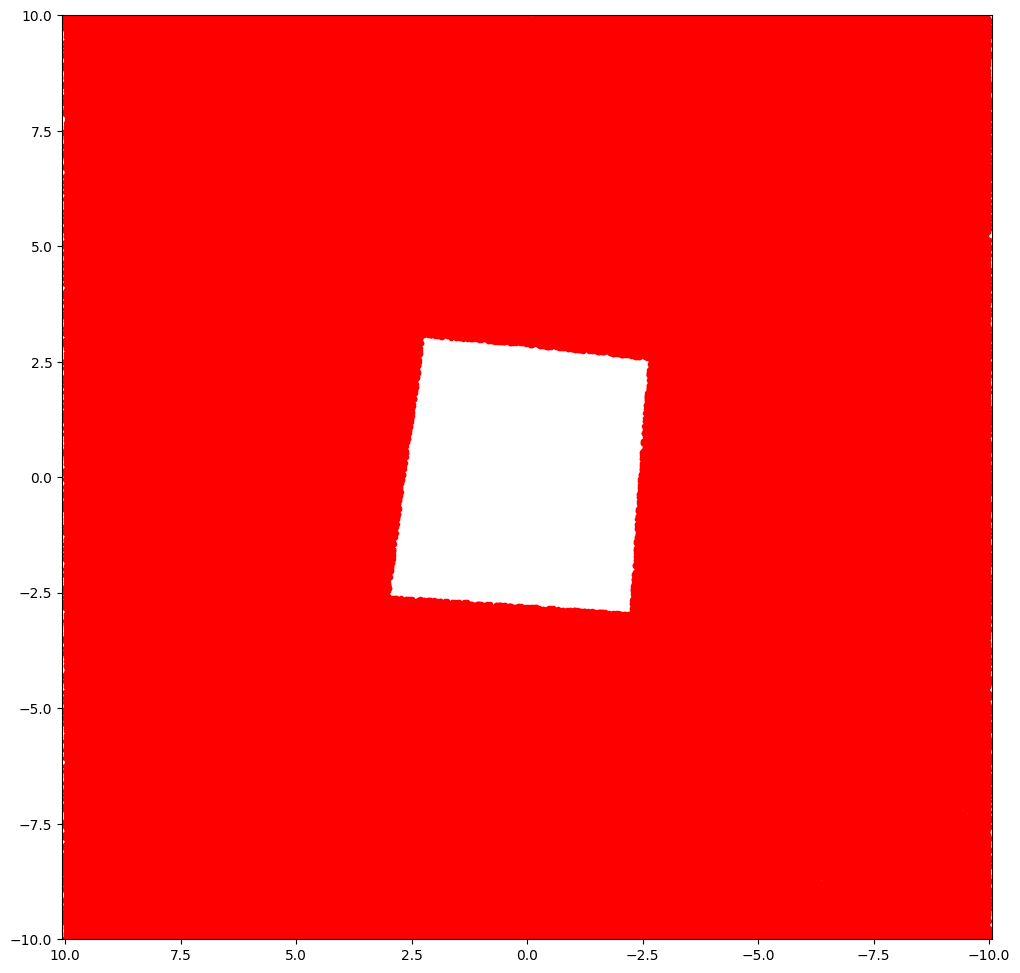

In [13]:
# Plot the surviving particles as green
plt.figure(1,figsize=(12,12))
plt.plot(x_norm[surv<=0], y_norm[surv<=0], '.', color='red',alpha=1)
# plt.plot(x_norm[surv>0], y_norm[surv>0], '.', color='green')
plt.axis('equal')
plt.axis([n_sigmas, -n_sigmas, -n_sigmas, n_sigmas])
plt.show()

In [73]:
np.sqrt(twiss['b1'].loc['tcp.d6l7.b1'].bety*3.5e-6/6500)/1e-3 * 10

1.9963169538788943

In [23]:
line['b1'].check_aperture()

KeyboardInterrupt: 

In [76]:
[ee for ee in list(line['b1'].element_names) if 'tcp' in ee]

['tcp.d6l7.b1',
 'tcp.c6l7.b1',
 'tcp.b6l7.b1',
 'tcpcv.a6l7.b1_aper',
 'tcpcv.a6l7.b1',
 'tcpch.a4l7.b1_aper',
 'tcpch.a4l7.b1',
 'tcp.6l3.b1']

In [54]:
line['b1'].elements[line['b1'].element_names.index('tcpcv.a6l7.b1_aper')]

AttributeError: 'Drift' object has no attribute 'aperture'

27221

In [43]:
line['b1'].elements['tcpcv.a6l7.b1_aper']

TypeError: tuple indices must be integers or slices, not str

In [40]:
line['b1'].elements[list(tcp_apertures.keys())[1]]

TypeError: tuple indices must be integers or slices, not str

In [24]:
[nn for nn in line['b1'].element_names if '_aper' in nn]

['tcpcv.a6l7.b1_aper', 'tcpch.a4l7.b1_aper']

In [3]:
twiss

{'b1':                        s             x            px             y  \
 name                                                                 
 ip3               0.0000 -1.155255e-07 -4.766949e-09  1.757476e-07   
 drift_0           0.0000 -1.155255e-07 -4.766949e-09  1.757476e-07   
 mcbwv.4r3.b1     21.0300 -2.157744e-07 -4.766949e-09  2.308550e-07   
 drift_1          21.0300 -2.157744e-07 -4.766949e-09  2.308550e-07   
 bpmw.4r3.b1      22.5205 -2.228795e-07 -4.766949e-09  2.347607e-07   
 ...                  ...           ...           ...           ...   
 drift_30723   26636.4387 -8.533768e-09 -4.766949e-09  1.169338e-07   
 mcbwh.4l3.b1  26640.1832 -2.638360e-08 -4.766949e-09  1.267459e-07   
 drift_30724   26640.1832 -2.638360e-08 -4.766949e-09  1.267459e-07   
 lhcb1ip3_p_   26658.8832 -1.155255e-07 -4.766949e-09  1.757476e-07   
 _end_point    26658.8832 -1.155255e-07 -4.766949e-09  1.757476e-07   
 
                         py          zeta         delta          ptau

In [3]:
line = xt.Line.from_json(LINEFOLDER + f'line_opticsfile32_{seq}.json')

Done loading line from dict.           


In [5]:
line.particle_ref

In [4]:
line_test = xPlus.importLine(LINEFOLDER + f'line_opticsfile32_{seq}.json')

Done loading line from dict.           


In [6]:
line_test.particle_ref

Particles(_capacity=1, _num_active_particles=1, _num_lost_particles=0, start_tracking_at_element=-1, q0=1.0, mass0=938272088.16, _p0c=[6.79999994e+12], _gamma0=[7247.36468857], _beta0=[0.99999999], s=[0.], zeta=[1.02733591e-07], _ptau=[4.52392643e-07], _delta=[4.52392647e-07], _rpp=[0.99999955], _rvv=[1.], chi=[1.], charge_ratio=[1.], weight=[1.], particle_id=[0], at_element=[0], at_turn=[0], state=[1], parent_particle_id=[0], _rng_s1=[0], _rng_s2=[0], _rng_s3=[0], _rng_s4=[0], x=[-1.15452677e-07], y=[1.75657612e-07], px=[-4.76933733e-09], py=[2.61995815e-09])

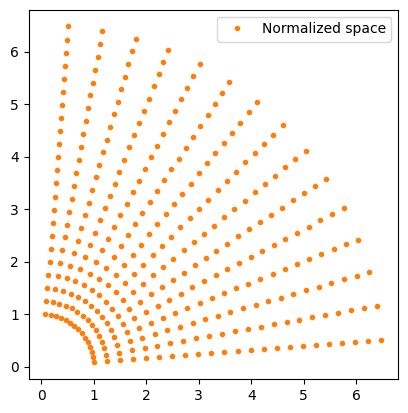

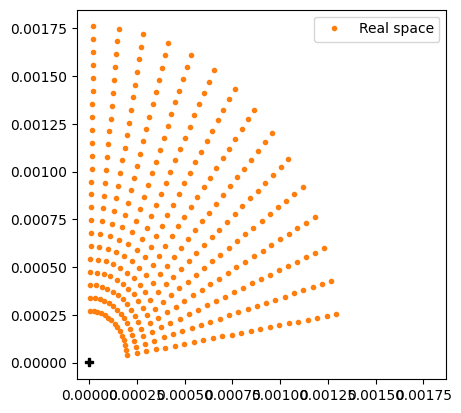

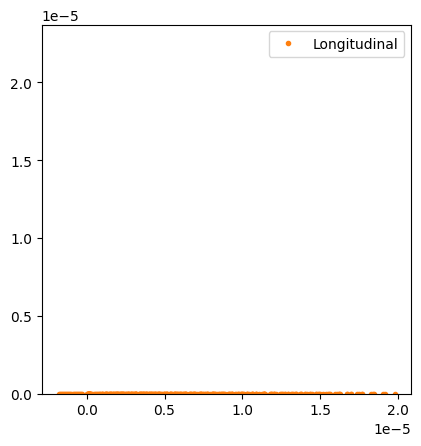

In [2]:


def generate_particles():
    # Generating Coord grid
    #=========================================================
    coordinates = phys.polar_grid(  r_sig     = np.linspace(1,6.5,23),
                                    theta_sig = np.linspace(0.05*np.pi/2,0.95*np.pi/2,15),
                                    emitt     = [B1.emittx,B1.emitty])
    coordinates.insert(0,'delta',0)
    group_length = len(coordinates)

    #coordinates = pd.concat([coordinates,coordinates,coordinates],ignore_index=True)
    #coordinates.loc[group_length:2*group_length,'delta'] = 0.55e-4#2.5e-9*tracker.line.particle_ref.beta0[0]*cst.c
    #coordinates.loc[2*group_length:,'delta']             = 1.10e-4#2.5e-9*tracker.line.particle_ref.beta0[0]*cst.c



    # Generation
    p0        = xp.Particles(mass0=tracker.line.particle_ref.mass0, q0 = tracker.line.particle_ref.q0 , p0c=tracker.line.particle_ref.p0c)
    particles = xp.build_particles( particle_ref = p0,
                                    tracker      = tracker,
                                    x_norm       = coordinates['x_sig'].values, 
                                    px_norm      = None, 
                                    y_norm       = coordinates['y_sig'].values, 
                                    py_norm      = None,
                                    zeta         = None,
                                    delta        = coordinates['delta'].values,
                scale_with_transverse_norm_emitt = [B1.emittx_n,B1.emitty_n])
    
    return particles,coordinates



particles,coordinates = generate_particles()


plt.figure()
plt.plot(coordinates['x_sig'],coordinates['y_sig'],'.',color='C1',label='Normalized space')
plt.axis('square')
plt.legend()


_tmp_twiss = pd.DataFrame(tracker.twiss(),columns = df_columns)
_tmp_twiss.set_index('name',inplace=True)
plt.figure()
plt.plot(particles.x   ,particles.y    ,'.',color='C1',label='Real space')
plt.plot(_tmp_twiss.loc['ip3','x'],_tmp_twiss.loc['ip3','y'],'P',color='k')
plt.axis('square')
plt.legend()


plt.figure()
plt.plot(particles.zeta   ,particles.delta    ,'.',color='C1',label='Longitudinal')
plt.axis('square')
plt.legend()



---

# Tracking

In [3]:


# Matching
#===================================
for _ip in ['ip1','ip5','ip2','ip8']:
    tracker.vars[f'{_ip}_bblr_ON'] = 0
    tracker.vars[f'{_ip}_bbho_ON'] = 0

tracker.vars['all_oct_ON']   = 1
tracker.vars['all_sext_ON']  = 1
tracker.match(vary=['dqx.b1','dqy.b1'], 
    targets = [
        ('qx', 62.31),
        ('qy', 60.32)])
tracker.match(vary=['dqpx.b1_sq','dqpy.b1_sq'],
    targets = [
        ('dqx', 15.0),
        ('dqy', 15.0)])

tw_final = tracker.twiss()
Qx_0,Qy_0 = np.round(np.mod(tw_final['qx'],1),4),np.round(np.mod(tw_final['qy'],1),4)
print('\nFinal twiss parameters')
print(f"Qx = {tw_final['qx']:.5f} Qy = {tw_final['qy']:.5f} "
      f"Q'x = {tw_final['dqx']:.5f} Q'y = {tw_final['dqy']:.5f}")
#===================================



Final twiss parameters
Qx = 62.31000 Qy = 60.32000 Q'x = 15.00000 Q'y = 15.00000


In [4]:


# Choosing knobs
#==========================
tracker.vars[f'ip1_bbho_ON'] = 0
tracker.vars[f'ip5_bbho_ON'] = 0

tracker.vars[f'ip1_bblr_ON'] = 0
tracker.vars[f'ip5_bblr_ON'] = 0

tracker.vars['all_oct_ON']   = 0
tracker.vars['all_sext_ON']  = 1
#==========================

particles,coordinates = generate_particles()
tracked_ref = xPlus.Tracking(tracker, particles, n_turns = 1024,progress=True)




# Choosing knobs
#==========================
tracker.vars[f'ip1_bbho_ON'] = 1/10
tracker.vars[f'ip5_bbho_ON'] = 1/10

tracker.vars[f'ip1_bblr_ON'] = 1/10
tracker.vars[f'ip5_bblr_ON'] = 1/10

tracker.vars['all_oct_ON']   = 0
tracker.vars['all_sext_ON']  = 1
#==========================


particles,coordinates = generate_particles()
tracked = xPlus.Tracking(tracker, particles, n_turns = 1024,progress=True)


# Try zeroing longitudinal
#particles.zeta *= 0
#particles.delta *= 0

#trackTwiss = pd.DataFrame(tracker.twiss(),columns = df_columns)
#trackTwiss.set_index('name',inplace=True)





Output()

generating ./4a2018bb4e24405d927a30815a84d3ed.c
the current directory is '/home/phbelang/abp/BBStudies/Examples'
running build_ext
building '4a2018bb4e24405d927a30815a84d3ed' extension
gcc -pthread -B /home/phbelang/abp/BBStudies/Executables/miniconda/compiler_compat -Wno-unused-result -Wsign-compare -DNDEBUG -O2 -Wall -fPIC -O2 -isystem /home/phbelang/abp/BBStudies/Executables/miniconda/include -I/home/phbelang/abp/BBStudies/Executables/miniconda/include -fPIC -O2 -isystem /home/phbelang/abp/BBStudies/Executables/miniconda/include -fPIC -I/home/phbelang/abp/BBStudies/Executables/py_BB/include -I/home/phbelang/abp/BBStudies/Executables/miniconda/include/python3.9 -c 4a2018bb4e24405d927a30815a84d3ed.c -o ./4a2018bb4e24405d927a30815a84d3ed.o -std=c99 -O3 -Wno-unused-function


gcc -pthread -B /home/phbelang/abp/BBStudies/Executables/miniconda/compiler_compat -shared -Wl,-rpath,/home/phbelang/abp/BBStudies/Executables/miniconda/lib -Wl,-rpath-link,/home/phbelang/abp/BBStudies/Executables/miniconda/lib -L/home/phbelang/abp/BBStudies/Executables/miniconda/lib -L/home/phbelang/abp/BBStudies/Executables/miniconda/lib -Wl,-rpath,/home/phbelang/abp/BBStudies/Executables/miniconda/lib -Wl,-rpath-link,/home/phbelang/abp/BBStudies/Executables/miniconda/lib -L/home/phbelang/abp/BBStudies/Executables/miniconda/lib ./4a2018bb4e24405d927a30815a84d3ed.o -o ./4a2018bb4e24405d927a30815a84d3ed.cpython-39-x86_64-linux-gnu.so -std=c99 -O3


Output()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


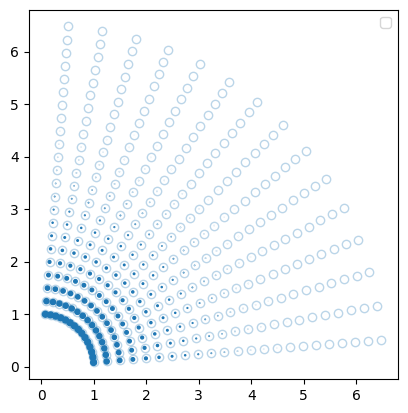

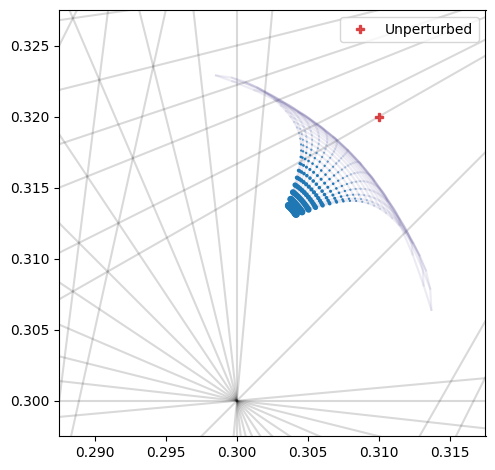

In [11]:
import scipy.stats as sciStat


plt.figure()
plt.plot(coordinates['x_sig'],coordinates['y_sig'],'o',color='C0',mfc='none',alpha=0.3)
plt.scatter(coordinates['x_sig'],coordinates['y_sig'],s = 30*sciStat.norm.pdf(coordinates['r_sig'])/sciStat.norm.pdf(0))
plt.axis('square')
plt.legend()
plt.savefig('footprint_coordinates.png',format='png',dpi=300)

window    = 0.03
Qx_0,Qy_0 = 0.31, 0.32
Qx_lim    = [Qx_0-3*window/4,Qx_0+window/4]
Qy_lim    = [Qy_0-3*window/4,Qy_0+window/4]

# Plotting



# ALL PARTICLES
chosen_particles = (coordinates['r_sig']>0)

Qx_tot = np.zeros(len(coordinates[chosen_particles]))+ Qx_0
Qy_tot = np.zeros(len(coordinates[chosen_particles]))+ Qy_0
plt.figure()

# orders = list(np.arange(12)+1)[::-1]
# lws    = np.linspace(1,8,len(orders))
# alphas = np.linspace(0.01,0.6,len(orders))

# for order,lw,alpha in zip(orders,lws,alphas):
#     bbplt.workingDiagram(Qx_range=Qx_lim,Qy_range=Qy_lim,order=[order],color='k',lw=lw, alpha=alpha)
#---------------
bbplt.workingDiagram(order=12,Qx_range=Qx_lim,Qy_range = Qy_lim,alpha=0.15)
tracked._tunesMTD     = 'pynaff'
tracked_ref._tunesMTD = 'pynaff'
dQx = tracked.tunes_n['Qx'] - tracked_ref.tunes_n['Qx']
dQy = tracked.tunes_n['Qy'] - tracked_ref.tunes_n['Qy']

Qx = Qx_0 + dQx*10
Qy = Qy_0 + dQy*10
#---------------

bbplt.polarmesh(Qx,Qy,alpha=0.1,r=coordinates[chosen_particles]['r_sig'],theta=coordinates[chosen_particles]['theta_sig'],color='darkslateblue')
plt.scatter(Qx,Qy,s = 30*sciStat.norm.pdf(coordinates['r_sig'])/sciStat.norm.pdf(0),zorder=10)
plt.plot(Qx_0,Qy_0,'P',color='C3',alpha=0.8,label='Unperturbed')

plt.legend(loc='upper right')
plt.axis('square')
plt.xlim(Qx_lim)
plt.ylim(Qy_lim)
plt.tight_layout()
plt.savefig('footprint_all_scaled.png',format='png',dpi=300)


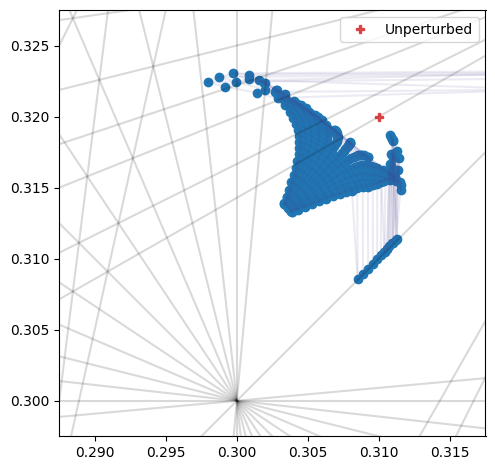

In [11]:
plt.figure()
bbplt.workingDiagram(order=12,Qx_range=Qx_lim,Qy_range = Qy_lim,alpha=0.15)
#---------------
tracked._tunesMTD     = 'nafflib'
tracked_ref._tunesMTD = 'nafflib'
dQx = tracked.tunes_n['Qx'] - tracked_ref.tunes_n['Qx']
dQy = tracked.tunes_n['Qy'] - tracked_ref.tunes_n['Qy']

Qx = Qx_0 + dQx
Qy = Qy_0 + dQy
#---------------

bbplt.polarmesh(Qx,Qy,alpha=0.1,r=coordinates[chosen_particles]['r_sig'],theta=coordinates[chosen_particles]['theta_sig'],color='darkslateblue')
plt.scatter(Qx,Qy)#s = 30*sciStat.norm.pdf(coordinates['r_sig'])/sciStat.norm.pdf(0),zorder=10)
plt.plot(Qx_0,Qy_0,'P',color='C3',alpha=0.8,label='Unperturbed')

plt.legend(loc='upper right')
plt.axis('square')
plt.xlim(Qx_lim)
plt.ylim(Qy_lim)
plt.tight_layout()

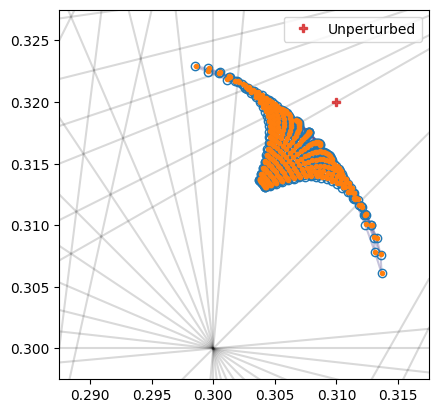

In [6]:
window    = 0.03
Qx_lim    = [Qx_0-3*window/4,Qx_0+window/4]
Qy_lim    = [Qy_0-3*window/4,Qy_0+window/4]


for tracked in [tracked_HO]:

    plt.close('all')
    plt.figure()
    bbplt.workingDiagram(order=12,Qx_range=Qx_lim,Qy_range = Qy_lim,alpha=0.15)


    tracked._tunesMTD     = 'pynaff'
    tracked_ref._tunesMTD = 'pynaff'
    dQx = tracked.tunes_n['Qx'] - tracked_ref.tunes_n['Qx']
    dQy = tracked.tunes_n['Qy'] - tracked_ref.tunes_n['Qy']

    Qx = Qx_0 + dQx
    Qy = Qy_0 + dQy
    bbplt.polarmesh(Qx,Qy,r=coordinates['r_sig'],theta=coordinates['theta_sig'],color='darkslateblue')
    plt.plot(Qx,Qy,'o',mfc='none')

    tracked._tunesMTD     = 'nafflib'
    tracked_ref._tunesMTD = 'nafflib'
    dQx = tracked.tunes_n['Qx'] - tracked_ref.tunes_n['Qx']
    dQy = tracked.tunes_n['Qy'] - tracked_ref.tunes_n['Qy']

    Qx = Qx_0 + dQx
    Qy = Qy_0 + dQy
    plt.plot(Qx,Qy,'.')
    

    plt.plot(Qx_0,Qy_0,'P',color='C3',alpha=0.8,label='Unperturbed')
    plt.legend()
    plt.axis('square')
    plt.xlim(Qx_lim)
    plt.ylim(Qy_lim)
    plt.savefig(f'tmp_fig/footprint_HO.png',format='png')


for idx,tracked in enumerate(tracking_results[::-1]):

    plt.close('all')
    plt.figure()
    bbplt.workingDiagram(order=12,Qx_range=Qx_lim,Qy_range = Qy_lim,alpha=0.15)


    tracked._tunesMTD     = 'pynaff'
    tracked_ref._tunesMTD = 'pynaff'
    dQx = tracked.tunes_n['Qx'] - tracked_ref.tunes_n['Qx']
    dQy = tracked.tunes_n['Qy'] - tracked_ref.tunes_n['Qy']

    Qx = Qx_0 + dQx
    Qy = Qy_0 + dQy
    bbplt.polarmesh(Qx,Qy,r=coordinates['r_sig'],theta=coordinates['theta_sig'],color='darkslateblue')
    plt.plot(Qx,Qy,'o',mfc='none')

    tracked._tunesMTD     = 'nafflib'
    tracked_ref._tunesMTD = 'nafflib'
    dQx = tracked.tunes_n['Qx'] - tracked_ref.tunes_n['Qx']
    dQy = tracked.tunes_n['Qy'] - tracked_ref.tunes_n['Qy']

    Qx = Qx_0 + dQx
    Qy = Qy_0 + dQy
    plt.plot(Qx,Qy,'.')
    

    plt.plot(Qx_0,Qy_0,'P',color='C3',alpha=0.8,label='Unperturbed')
    plt.legend()
    plt.axis('equal')
    plt.xlim([0.308,0.312])
    plt.ylim([0.318,0.322])
    plt.savefig(f'tmp_fig/footprint_lr_{str(idx).zfill(2)}.png',format='png')


plt.close('all')
plt.figure()
bbplt.workingDiagram(order=12,Qx_range=Qx_lim,Qy_range = Qy_lim,alpha=0.15)

tracked._tunesMTD     = 'pynaff'
tracked_ref._tunesMTD = 'pynaff'
Qx_tot = np.zeros(len(tracked.tunes_n['Qx']))+ Qx_0
Qy_tot = np.zeros(len(tracked.tunes_n['Qx']))+ Qy_0
for idx,tracked in enumerate(tracking_results + [tracked_HO]):
    dQx = tracked.tunes_n['Qx'] - tracked_ref.tunes_n['Qx']
    dQy = tracked.tunes_n['Qy'] - tracked_ref.tunes_n['Qy']
    Qx_tot += dQx
    Qy_tot += dQy
bbplt.polarmesh(Qx_tot,Qy_tot,r=coordinates['r_sig'],theta=coordinates['theta_sig'],color='darkslateblue')
plt.plot(Qx_tot,Qy_tot,'o',mfc='none')

tracked._tunesMTD     = 'nafflib'
tracked_ref._tunesMTD = 'nafflib'
Qx_tot = np.zeros(len(tracked.tunes_n['Qx']))+ Qx_0
Qy_tot = np.zeros(len(tracked.tunes_n['Qx']))+ Qy_0
for idx,tracked in enumerate(tracking_results+[tracked_HO]):
    dQx = tracked.tunes_n['Qx'] - tracked_ref.tunes_n['Qx']
    dQy = tracked.tunes_n['Qy'] - tracked_ref.tunes_n['Qy']
    Qx_tot += dQx
    Qy_tot += dQy
plt.plot(Qx_tot,Qy_tot,'.')
plt.plot(Qx_0,Qy_0,'P',color='C3',alpha=0.8,label='Unperturbed')

plt.legend(loc='upper right')
plt.axis('square')
plt.xlim(Qx_lim)
plt.ylim(Qy_lim)
plt.savefig(f'tmp_fig/footprint_TOTAL.png',format='png')

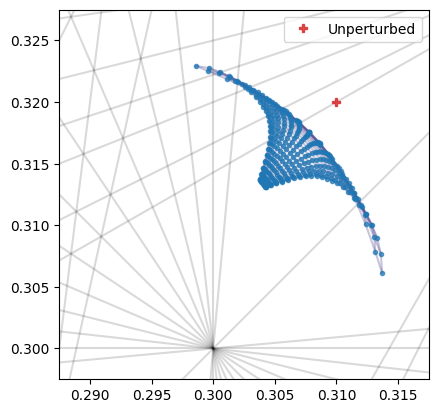

In [7]:
window    = 0.03
Qx_lim    = [Qx_0-3*window/4,Qx_0+window/4]
Qy_lim    = [Qy_0-3*window/4,Qy_0+window/4]


for tracked in [tracked_HO]:

    plt.close('all')
    plt.figure()
    bbplt.workingDiagram(order=12,Qx_range=Qx_lim,Qy_range = Qy_lim,alpha=0.15)


    tracked._tunesMTD     = 'pynaff'
    tracked_ref._tunesMTD = 'pynaff'
    dQx = tracked.tunes_n['Qx'] - tracked_ref.tunes_n['Qx']
    dQy = tracked.tunes_n['Qy'] - tracked_ref.tunes_n['Qy']

    Qx = Qx_0 + dQx
    Qy = Qy_0 + dQy
    bbplt.polarmesh(Qx,Qy,r=coordinates['r_sig'],theta=coordinates['theta_sig'],color='darkslateblue')
    plt.plot(Qx,Qy,'.',alpha=0.7)
    

    plt.plot(Qx_0,Qy_0,'P',color='C3',alpha=0.8,label='Unperturbed')
    plt.legend()
    plt.axis('square')
    plt.xlim(Qx_lim)
    plt.ylim(Qy_lim)
    plt.savefig(f'tmp_fig2/footprint_HO.png',format='png')


for idx,tracked in enumerate(tracking_results[::-1]):

    plt.close('all')
    plt.figure()
    bbplt.workingDiagram(order=12,Qx_range=Qx_lim,Qy_range = Qy_lim,alpha=0.15)


    tracked._tunesMTD     = 'pynaff'
    tracked_ref._tunesMTD = 'pynaff'
    dQx = tracked.tunes_n['Qx'] - tracked_ref.tunes_n['Qx']
    dQy = tracked.tunes_n['Qy'] - tracked_ref.tunes_n['Qy']

    Qx = Qx_0 + dQx
    Qy = Qy_0 + dQy
    bbplt.polarmesh(Qx,Qy,r=coordinates['r_sig'],theta=coordinates['theta_sig'],color='darkslateblue')
    plt.plot(Qx,Qy,'.',alpha=0.7)
    

    plt.plot(Qx_0,Qy_0,'P',color='C3',alpha=0.8,label='Unperturbed')
    plt.legend()
    plt.axis('equal')
    plt.xlim([0.308,0.312])
    plt.ylim([0.318,0.322])
    plt.savefig(f'tmp_fig2/footprint_lr_{str(idx).zfill(2)}.png',format='png')


plt.close('all')
plt.figure()
bbplt.workingDiagram(order=12,Qx_range=Qx_lim,Qy_range = Qy_lim,alpha=0.15)

tracked._tunesMTD     = 'pynaff'
tracked_ref._tunesMTD = 'pynaff'
Qx_tot = np.zeros(len(tracked.tunes_n['Qx']))+ Qx_0
Qy_tot = np.zeros(len(tracked.tunes_n['Qx']))+ Qy_0
for idx,tracked in enumerate(tracking_results + [tracked_HO]):
    dQx = tracked.tunes_n['Qx'] - tracked_ref.tunes_n['Qx']
    dQy = tracked.tunes_n['Qy'] - tracked_ref.tunes_n['Qy']
    Qx_tot += dQx
    Qy_tot += dQy
bbplt.polarmesh(Qx_tot,Qy_tot,r=coordinates['r_sig'],theta=coordinates['theta_sig'],color='darkslateblue')
plt.plot(Qx_tot,Qy_tot,'.',alpha=0.7)

plt.plot(Qx_0,Qy_0,'P',color='C3',alpha=0.8,label='Unperturbed')

plt.legend(loc='upper right')
plt.axis('square')
plt.xlim(Qx_lim)
plt.ylim(Qy_lim)
plt.savefig(f'tmp_fig2/footprint_TOTAL.png',format='png')

In [8]:
sys.exit(0)

SystemExit: 0

/home/phbelang/abp/BBStudies/Executables/py_BB/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3386: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


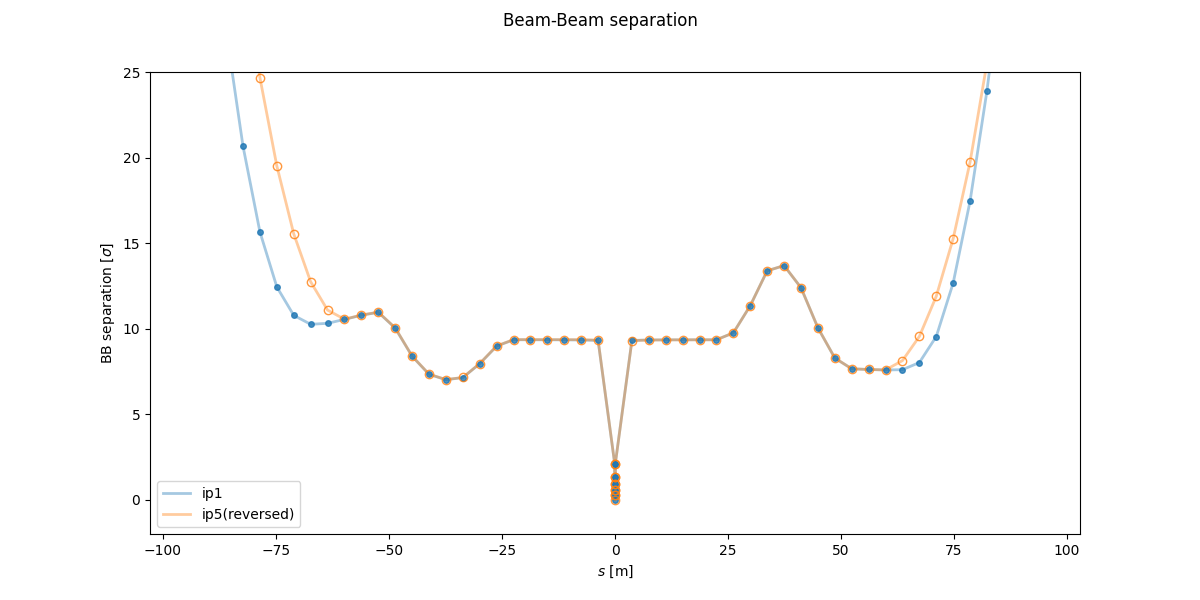

In [ ]:
fig = plt.figure(figsize=(12,6))
fig.suptitle(f'Beam-Beam separation')

for _IP in [IP1,IP5]:
    
    # Plotting   
   
    dx_n_tot = np.sqrt(_IP.bb['dx_n']**2 + _IP.bb['dy_n']**2)
    if _IP.name == 'ip1':
        plt.plot(_IP.bb['s'],dx_n_tot,'-',color='C0',alpha=0.4,lw=2,label=_IP.name,zorder=-10)
        plt.plot(_IP.bb['s'],dx_n_tot,ls='' ,color='C0',alpha=0.8,marker='.',ms=8)
    else:
        plt.plot(-_IP.bb['s'],dx_n_tot,'-',color='C1',alpha=0.4,lw=2,label=_IP.name + '(reversed)',zorder=-9)
        plt.plot(-_IP.bb['s'],dx_n_tot,ls='' ,color='C1',alpha=0.8,marker='.',mfc='none',ms=12)
    plt.legend()
    
    plt.xlabel(r'$s$ [m]')
    plt.ylabel(r'BB separation [$\sigma$]')
    
    plt.ylim([-2,25])